# Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.ticker import PercentFormatter, MultipleLocator
import tikzplotlib  # type: ignore

# Results directory

In [2]:
RESULTS_DIR_SRMP = Path("results/ITOR_V4_SRMP/")
RESULTS_DIR_RMP = Path("results/ITOR_V4_RMP/")

# File

In [3]:
TRAIN_FILE_SRMP = RESULTS_DIR_SRMP / "train_results.csv"
TEST_FILE_SRMP = RESULTS_DIR_SRMP / "test_results.csv"

TRAIN_FILE_RMP = RESULTS_DIR_RMP / "train_results.csv"
TEST_FILE_RMP = RESULTS_DIR_RMP / "test_results.csv"

# Read files

In [4]:
df_train_SRMP = pd.read_csv(TRAIN_FILE_SRMP, index_col=list(range(16)))
df_test_SRMP = (
    pd.read_csv(TEST_FILE_SRMP, index_col=list(range(18)))
    .pivot(columns="Name")
    .droplevel(0, axis=1)
)

df_train_RMP = pd.read_csv(TRAIN_FILE_RMP, index_col=list(range(16)))
df_test_RMP = (
    pd.read_csv(TEST_FILE_RMP, index_col=list(range(18)))
    .pivot(columns="Name")
    .droplevel(0, axis=1)
)

# Merge data

In [5]:
df_SRMP = df_test_SRMP.join(df_train_SRMP).reset_index()
df_SRMP

M  N_tr  Atr_id    Mo  Ko  Group_size  Mo_id  N_bc  Same_alt  Error  \
0     7   500       0  SRMP   1           1      0   100      True      0   
1     7   500       0  SRMP   1           1      0   300      True      0   
2     7   500       0  SRMP   1           1      0   500      True      0   
3     7   500       0  SRMP   1           1      0  1000      True      0   
4     7   500       0  SRMP   1           1      0  2000      True      0   
..   ..   ...     ...   ...  ..         ...    ...   ...       ...    ...   
595  15   500       9  SRMP   4           1      9   100      True      0   
596  15   500       9  SRMP   4           1      9   300      True      0   
597  15   500       9  SRMP   4           1      9   500      True      0   
598  15   500       9  SRMP   4           1      9  1000      True      0   
599  15   500       9  SRMP   4           1      9  2000      True      0   

     ...  Config Me_id  N_te Ate_id   FITNESS   KENDALL  SPEARMAN  \
0    ...       0     0  5000      0  0.843773  0.744609  0.880442   
1    ...       0     0  5000      0  0.967736  0.957602  0.987482   
2    ...       0     0  5000      0  0.986396  0.982124  0.993912   
3    ...       0     0  5000      0  0.995939  0.993875  0.997554   
4    ...       0     0  5000      0  0.997982  0.997325  0.998529   
..   ...     ...   ...   ...    ...       ...       ...       ...   
595  ...       0     9  5000      9  0.581949  0.163926  0.242429   
596  ...       0     9  5000      9  0.792459  0.584921  0.783554   
597  ...       0     9  5000      9  0.949902  0.899803  0.980014   
598  ...       0     9  5000      9  0.901454  0.802909  0.945703   
599  ...       0     9  5000      9  0.982782  0.965563  0.994058   

            Time  Fitness      It  
0       2.641450    1.000    1090  
1      19.127279    1.000    5691  
2      59.811580    1.000   11043  
3     186.387068    1.000   14601  
4     296.543192    1.000   24971  
..           ...      ...     ...  
595   732.613074    0.900  100000  
596  1396.597864    0.960  100000  
597  1073.002200    1.000   54932  
598  2789.224427    0.960  100000  
599  2633.981193    0.997  100000  

[600 rows x 24 columns]

In [6]:
df_RMP = df_test_RMP.join(df_train_RMP).reset_index()
df_RMP

M  N_tr  Atr_id   Mo  Ko  Group_size  Mo_id  N_bc  Same_alt  Error  ...  \
0    3   500       0  RMP   1           1      0   100      True      0  ...   
1    3   500       0  RMP   1           1      0   300      True      0  ...   
2    3   500       0  RMP   1           1      0   500      True      0  ...   
3    3   500       0  RMP   1           1      0  1000      True      0  ...   
4    3   500       0  RMP   1           1      0  2000      True      0  ...   
..  ..   ...     ...  ...  ..         ...    ...   ...       ...    ...  ...   
795  6   500       9  RMP   4           1      9   100      True      0  ...   
796  6   500       9  RMP   4           1      9   300      True      0  ...   
797  6   500       9  RMP   4           1      9   500      True      0  ...   
798  6   500       9  RMP   4           1      9  1000      True      0  ...   
799  6   500       9  RMP   4           1      9  2000      True      0  ...   

     Config Me_id  N_te Ate_id   FITNESS   KENDALL  SPEARMAN         Time  \
0         0     0  5000      0  0.966340  0.927222  0.972040    26.129692   
1         0     0  5000      0  0.989981  0.988397  0.993302    29.599359   
2         0     0  5000      0  0.968419  0.963494  0.975656   710.729263   
3         0     0  5000      0  0.996991  0.996439  0.996994    53.172264   
4         0     0  5000      0  0.985391  0.983315  0.993157   957.503302   
..      ...   ...   ...    ...       ...       ...       ...          ...   
795       0     9  5000      9  0.840750  0.690777  0.848401   846.592158   
796       0     9  5000      9  0.923895  0.852764  0.944225   243.340623   
797       0     9  5000      9  0.941456  0.889402  0.970589  2036.010983   
798       0     9  5000      9  0.906612  0.819967  0.942225  2303.599508   
799       0     9  5000      9  0.978232  0.959582  0.988689  1832.712892   

     Fitness      It  
0      1.000    4386  
1      1.000    5605  
2      0.994  100000  
3      1.000    6254  
4      0.988  100000  
..       ...     ...  
795    0.990  100000  
796    1.000   15647  
797    0.996  100000  
798    0.972  100000  
799    1.000   72975  

[800 rows x 24 columns]

# Plot

## Optimality

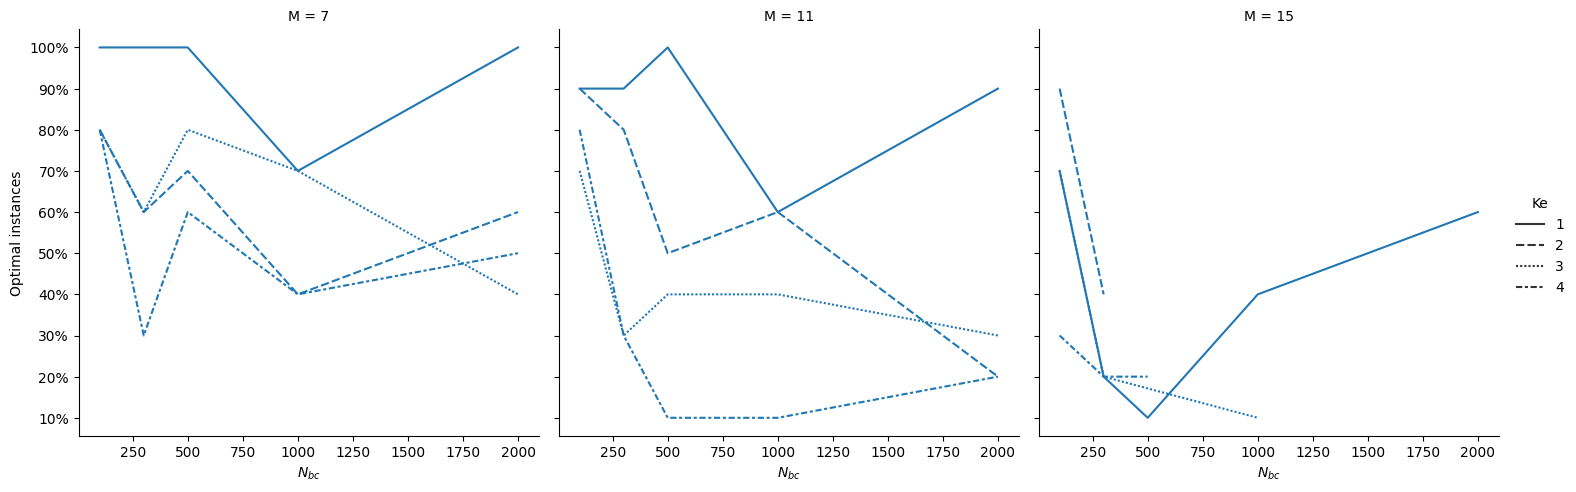

In [29]:
df = df_SRMP

dff = df[(df["Error"] == 0) & (df["Ke"] == df["Ko"]) & (df["Fitness"] == 1)].groupby(['M', 'N_bc', 'Ke']).agg(Atr_id_count=('Atr_id', 'count')).reset_index()

g = sns.relplot(
    data=dff,
    x="N_bc",
    y="Atr_id_count",
    style="Ke",
    col="M",
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

g.set(xlabel='$N_{bc}$', ylabel='Optimal instances')

MAX = 10

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(MAX))
    ax.yaxis.set_major_locator(MultipleLocator(MAX / 10))

tikzplotlib.save("mytikz.tex", standalone=True)

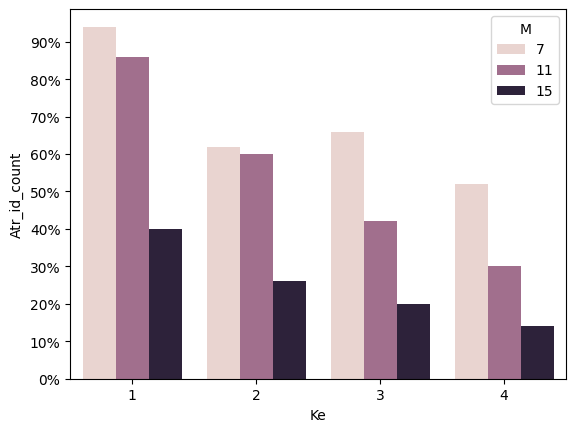

In [30]:
df = df_SRMP

dff = df[(df["Error"] == 0) & (df["Ke"] == df["Ko"]) & (df["Fitness"] == 1)].groupby(['M', 'Ke']).agg(Atr_id_count=('Atr_id', 'count')).reset_index()

g = sns.barplot(
    data=dff,
    x="Ke",
    y="Atr_id_count",
    hue="M",
)

# g.set(xlabel='$N_{bc}$', ylabel='Optimal instances')

MAX = 50

g.yaxis.set_major_formatter(PercentFormatter(MAX))
g.yaxis.set_major_locator(MultipleLocator(MAX / 10))

# tikzplotlib.save("mytikz.tex", standalone=True)

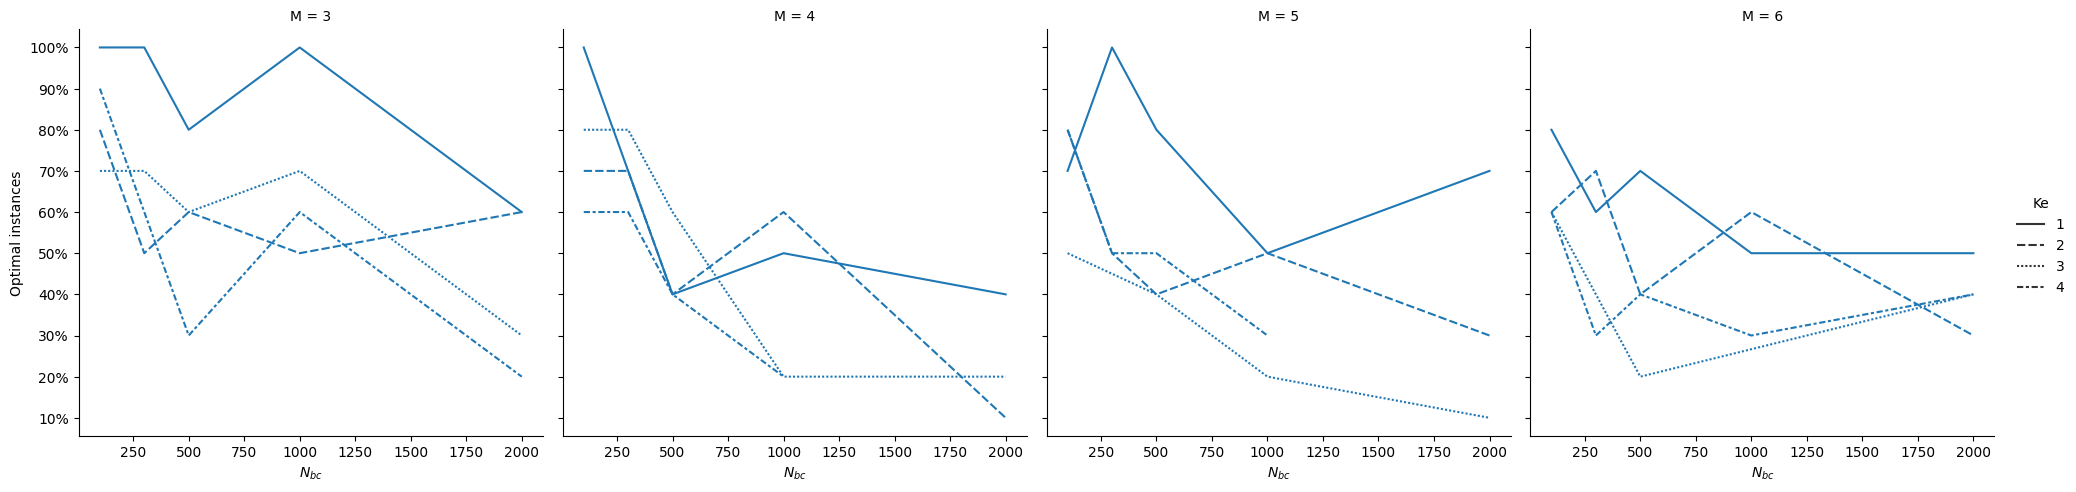

In [31]:
df = df_RMP

dff = df[(df["Error"] == 0) & (df["Ke"] == df["Ko"]) & (df["Fitness"] == 1)].groupby(['M', 'N_bc', 'Ke']).agg(Atr_id_count=('Atr_id', 'count')).reset_index()

g = sns.relplot(
    data=dff,
    x="N_bc",
    y="Atr_id_count",
    style="Ke",
    col="M",
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

g.set(xlabel='$N_{bc}$', ylabel='Optimal instances')

MAX = 10

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(MAX))
    ax.yaxis.set_major_locator(MultipleLocator(MAX / 10))

tikzplotlib.save("mytikz.tex", standalone=True)

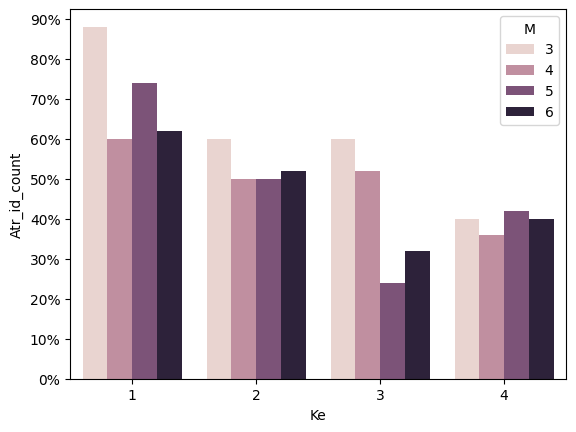

In [32]:
df = df_RMP

dff = df[(df["Error"] == 0) & (df["Ke"] == df["Ko"]) & (df["Fitness"] == 1)].groupby(['M', 'Ke']).agg(Atr_id_count=('Atr_id', 'count')).reset_index()

g = sns.barplot(
    data=dff,
    x="Ke",
    y="Atr_id_count",
    hue="M",
)

# g.set(xlabel='$N_{bc}$', ylabel='Optimal instances')

MAX = 50

g.yaxis.set_major_formatter(PercentFormatter(MAX))
g.yaxis.set_major_locator(MultipleLocator(MAX / 10))

# tikzplotlib.save("mytikz.tex", standalone=True)

## Time

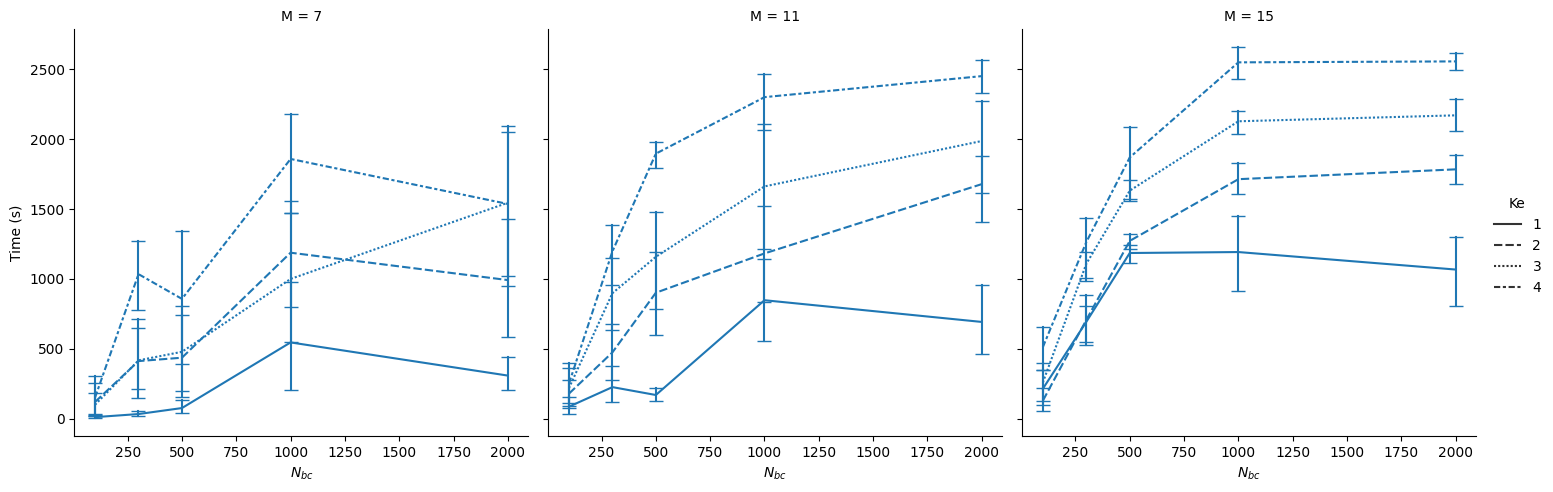

In [7]:
df = df_SRMP

dff = df[(df["Error"] == 0) & (df["Ke"] == df["Ko"])]

g = sns.relplot(
    data=dff,
    x="N_bc",
    y="Time",
    style="Ke",
    col="M",
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

g.set(xlabel='$N_{bc}$', ylabel='Time (s)')

# plt.yscale("log")

tikzplotlib.save("mytikz.tex", standalone=True)

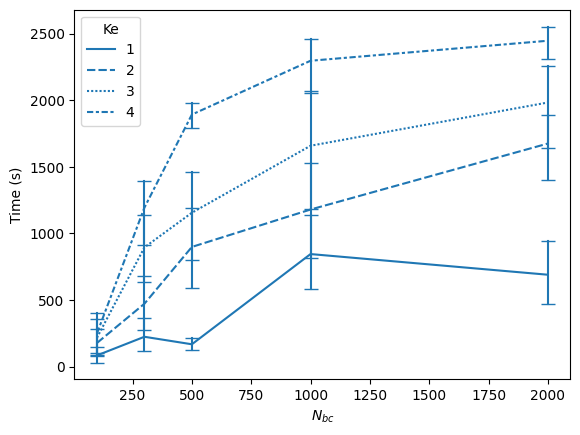

In [34]:
df = df_SRMP

dff = df[(df["Error"] == 0) & (df["Ke"] == df["Ko"])]

g = sns.lineplot(
    data=dff[dff["M"] == 11],
    x="N_bc",
    y="Time",
    style="Ke",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

g.set(xlabel='$N_{bc}$', ylabel='Time (s)')

# plt.yscale("log")

tikzplotlib.save("mytikz.tex", standalone=True)

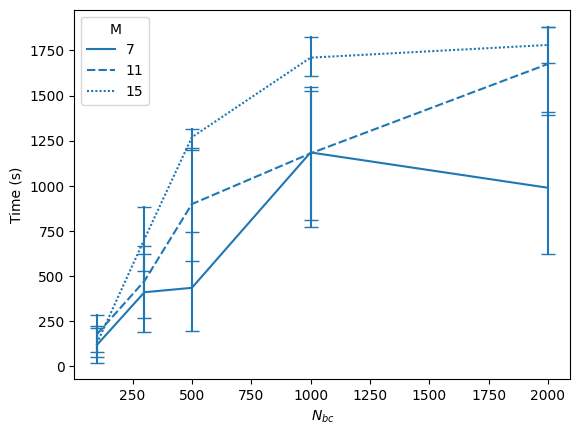

In [35]:
df = df_SRMP

dff = df[(df["Error"] == 0) & (df["Ke"] == df["Ko"])]

g = sns.lineplot(
    data=dff[dff["Ke"] == 2],
    x="N_bc",
    y="Time",
    style="M",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

g.set(xlabel='$N_{bc}$', ylabel='Time (s)')

# plt.yscale("log")

tikzplotlib.save("mytikz.tex", standalone=True)

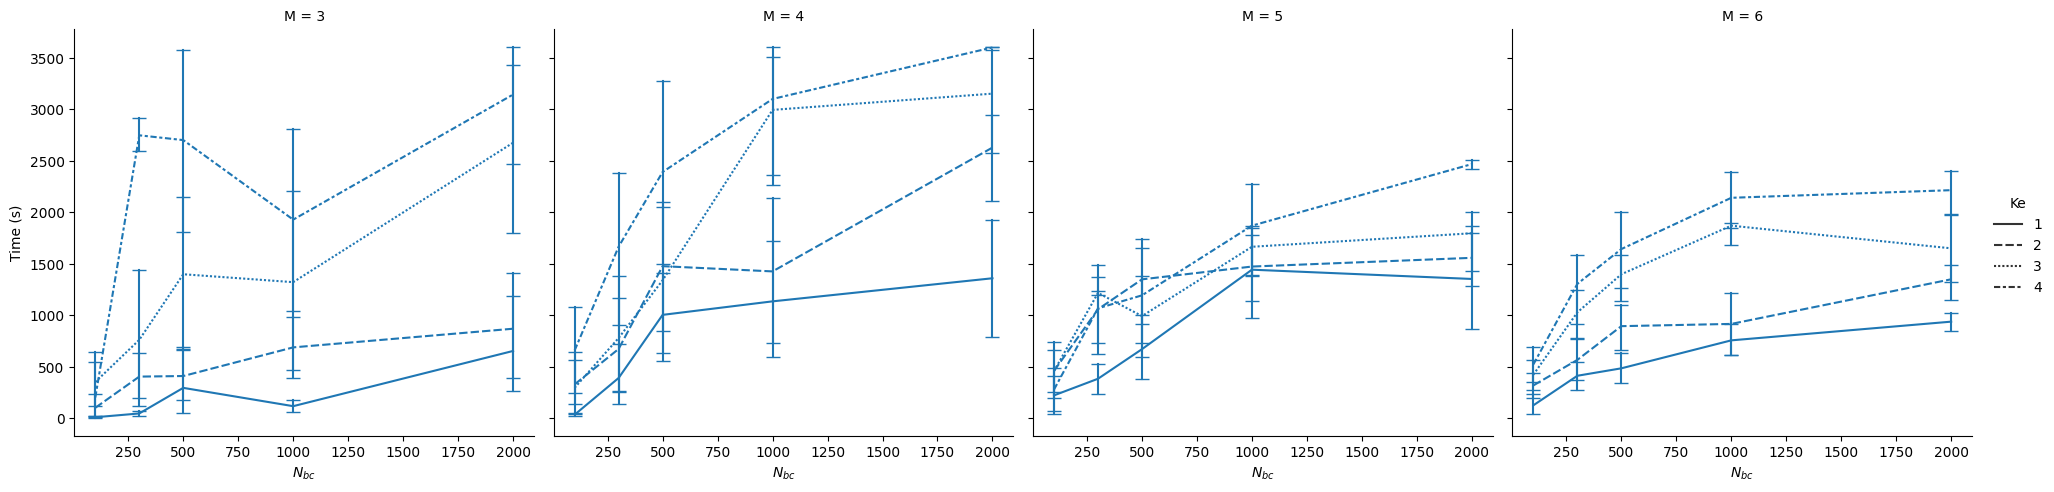

In [36]:
df = df_RMP

dff = df[(df["Error"] == 0) & (df["Ke"] == df["Ko"])]

g = sns.relplot(
    data=dff,
    x="N_bc",
    y="Time",
    style="Ke",
    col="M",
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

g.set(xlabel='$N_{bc}$', ylabel='Time (s)')

# plt.yscale("log")

tikzplotlib.save("mytikz.tex", standalone=True)

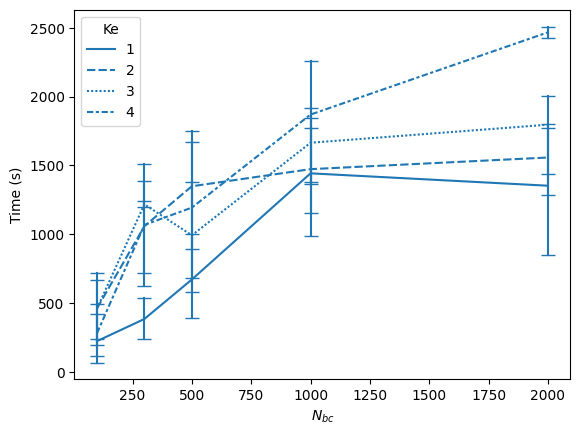

In [39]:
df = df_RMP

dff = df[(df["Error"] == 0) & (df["Ke"] == df["Ko"])]

g = sns.lineplot(
    data=dff[dff["M"] == 5],
    x="N_bc",
    y="Time",
    style="Ke",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

g.set(xlabel='$N_{bc}$', ylabel='Time (s)')

# plt.yscale("log")

tikzplotlib.save("mytikz.tex", standalone=True)

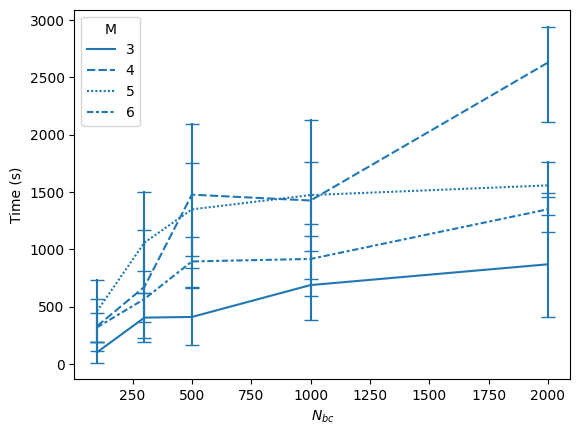

In [40]:
df = df_RMP

dff = df[(df["Error"] == 0) & (df["Ke"] == df["Ko"])]

g = sns.lineplot(
    data=dff[dff["Ke"] == 2],
    x="N_bc",
    y="Time",
    style="M",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

g.set(xlabel='$N_{bc}$', ylabel='Time (s)')

# plt.yscale("log")

tikzplotlib.save("mytikz.tex", standalone=True)

## Ground truth

### Train

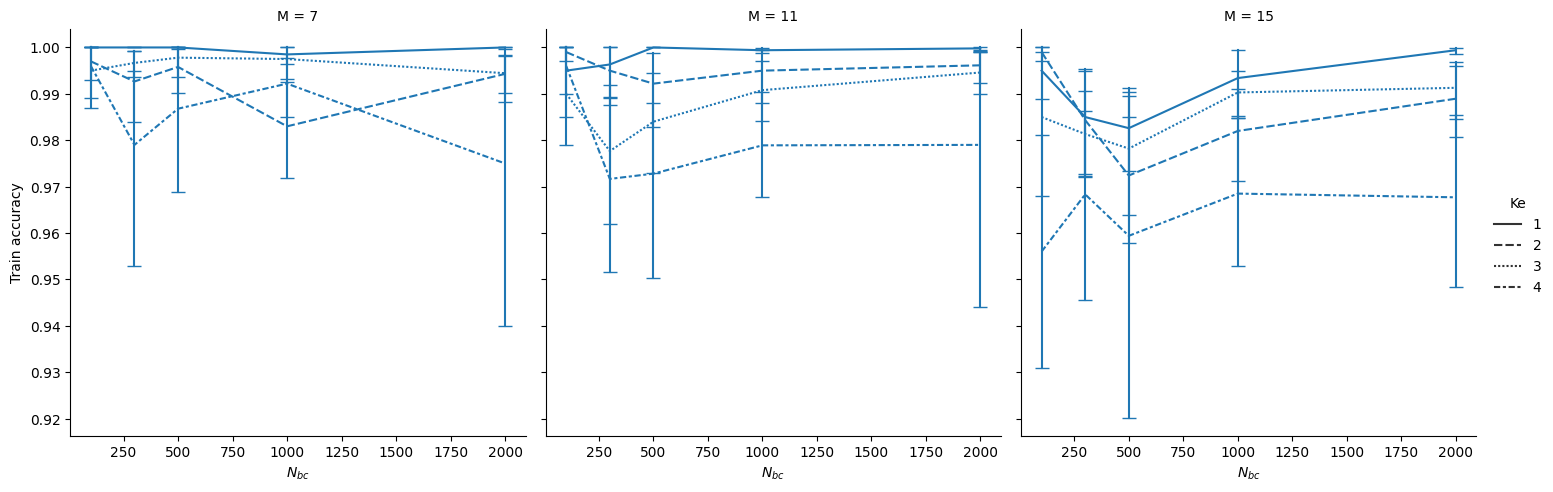

In [8]:
df = df_SRMP

dff = df[(df["Error"] == 0) & (df["Ke"] == df["Ko"])]

g = sns.relplot(
    data=dff,
    x="N_bc",
    y="Fitness",
    style="Ke",
    col="M",
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

g.set(xlabel='$N_{bc}$', ylabel='Train accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

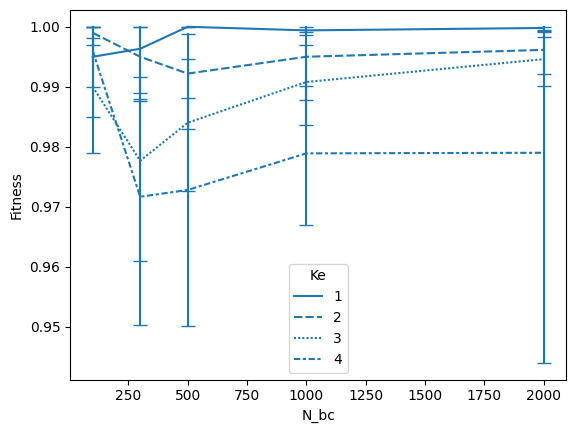

In [9]:
df = df_SRMP

dff = df[(df["Error"] == 0) & (df["Ke"] == df["Ko"])]

g = sns.lineplot(
    data=dff[dff["M"] == 11],
    x="N_bc",
    y="Fitness",
    style="Ke",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

# g.set(xlabel='$N_{bc}$', ylabel='Train accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

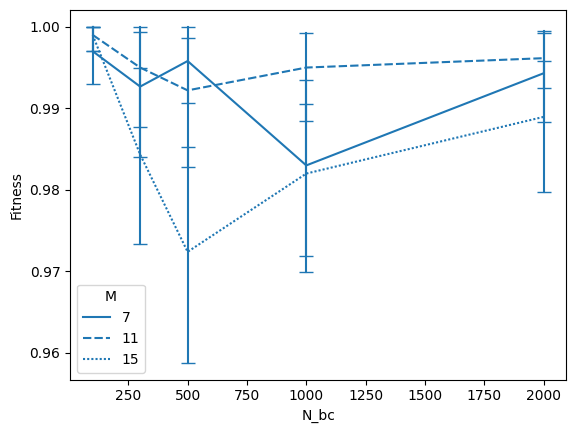

In [43]:
df = df_SRMP

dff = df[(df["Error"] == 0) & (df["Ke"] == df["Ko"])]

g = sns.lineplot(
    data=dff[dff["Ke"] == 2],
    x="N_bc",
    y="Fitness",
    style="M",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

# g.set(xlabel='$N_{bc}$', ylabel='Train accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

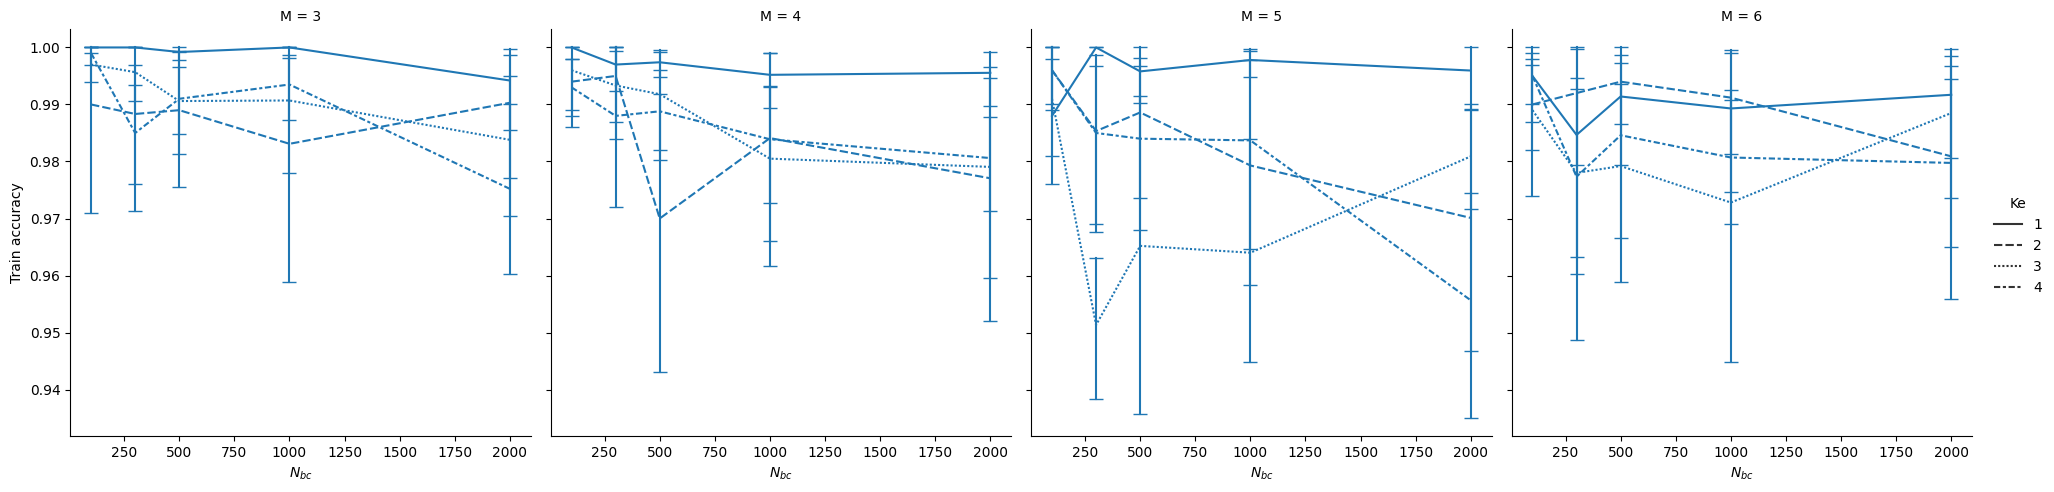

In [44]:
df = df_RMP

dff = df[(df["Error"] == 0) & (df["Ke"] == df["Ko"])]

g = sns.relplot(
    data=dff,
    x="N_bc",
    y="Fitness",
    style="Ke",
    col="M",
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

g.set(xlabel='$N_{bc}$', ylabel='Train accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

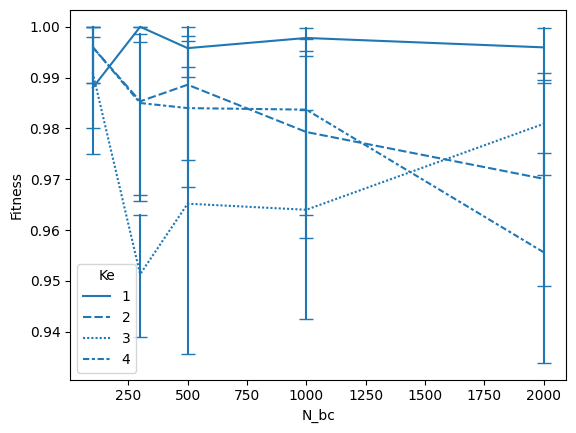

In [45]:
df = df_RMP

dff = df[(df["Error"] == 0) & (df["Ke"] == df["Ko"])]

g = sns.lineplot(
    data=dff[dff["M"] == 5],
    x="N_bc",
    y="Fitness",
    style="Ke",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

# g.set(xlabel='$N_{bc}$', ylabel='Train accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

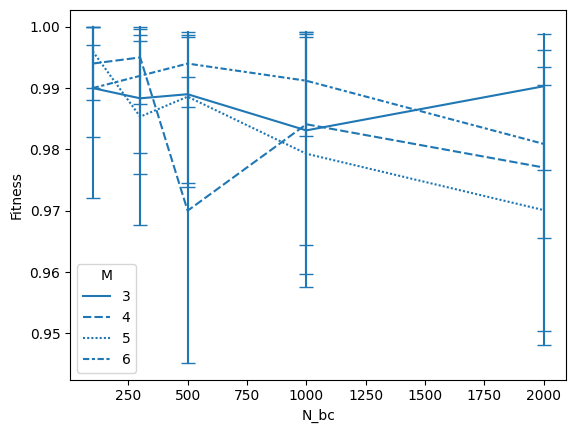

In [46]:
df = df_RMP

dff = df[(df["Error"] == 0) & (df["Ke"] == df["Ko"])]

g = sns.lineplot(
    data=dff[dff["Ke"] == 2],
    x="N_bc",
    y="Fitness",
    style="M",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

# g.set(xlabel='$N_{bc}$', ylabel='Train accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

### Test

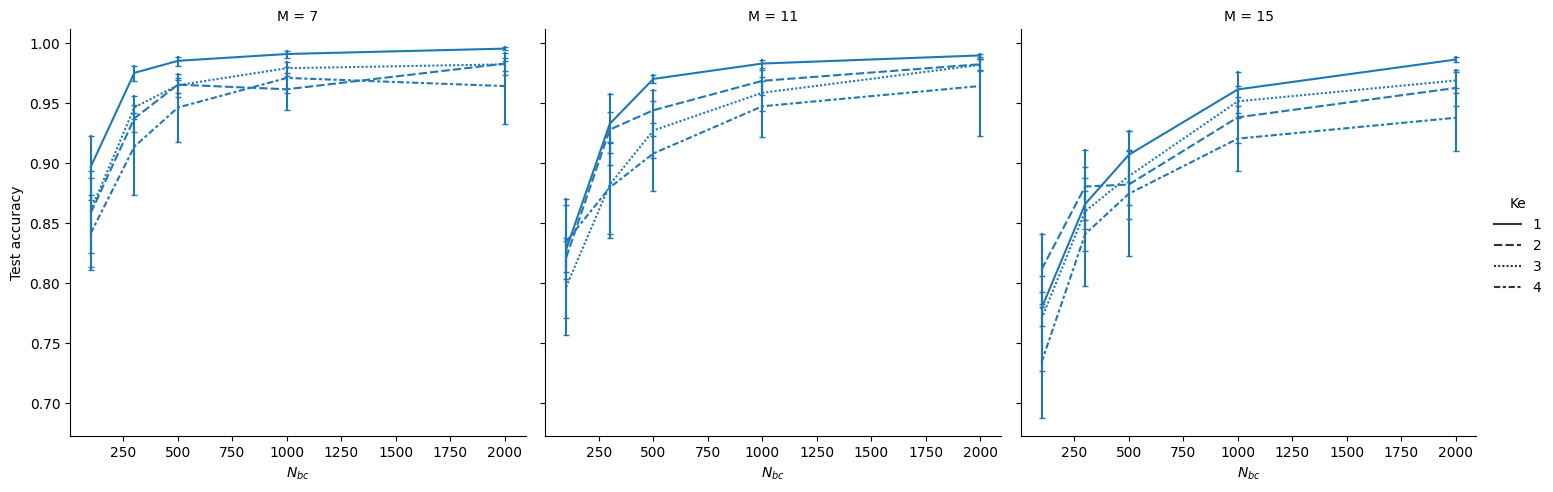

In [10]:
df = df_SRMP

dff = df[(df["Error"] == 0) & (df["Ke"] == df["Ko"])]

g = sns.relplot(
    data=dff,
    x="N_bc",
    y="FITNESS",
    style="Ke",
    col="M",
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 2},
)

g.set(xlabel='$N_{bc}$', ylabel='Test accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

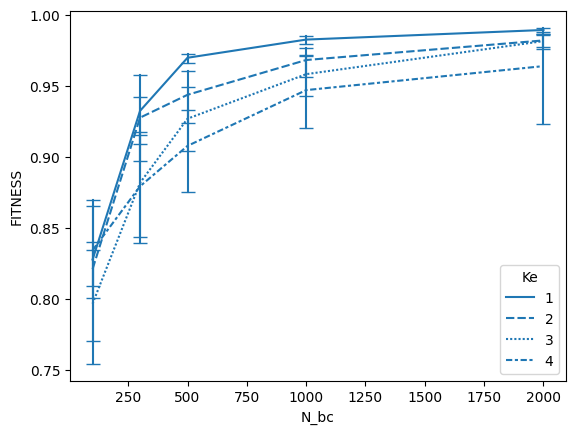

In [48]:
df = df_SRMP

dff = df[(df["Error"] == 0) & (df["Ke"] == df["Ko"])]

g = sns.lineplot(
    data=dff[dff["M"] == 11],
    x="N_bc",
    y="FITNESS",
    style="Ke",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

# g.set(xlabel='$N_{bc}$', ylabel='Train accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

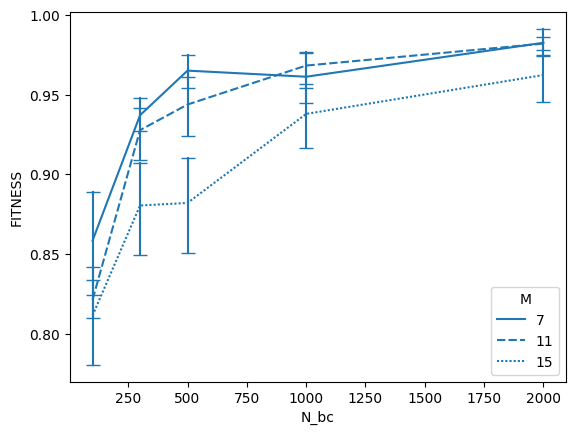

In [11]:
df = df_SRMP

dff = df[(df["Error"] == 0) & (df["Ke"] == df["Ko"])]

g = sns.lineplot(
    data=dff[dff["Ke"] == 2],
    x="N_bc",
    y="FITNESS",
    style="M",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

# g.set(xlabel='$N_{bc}$', ylabel='Train accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

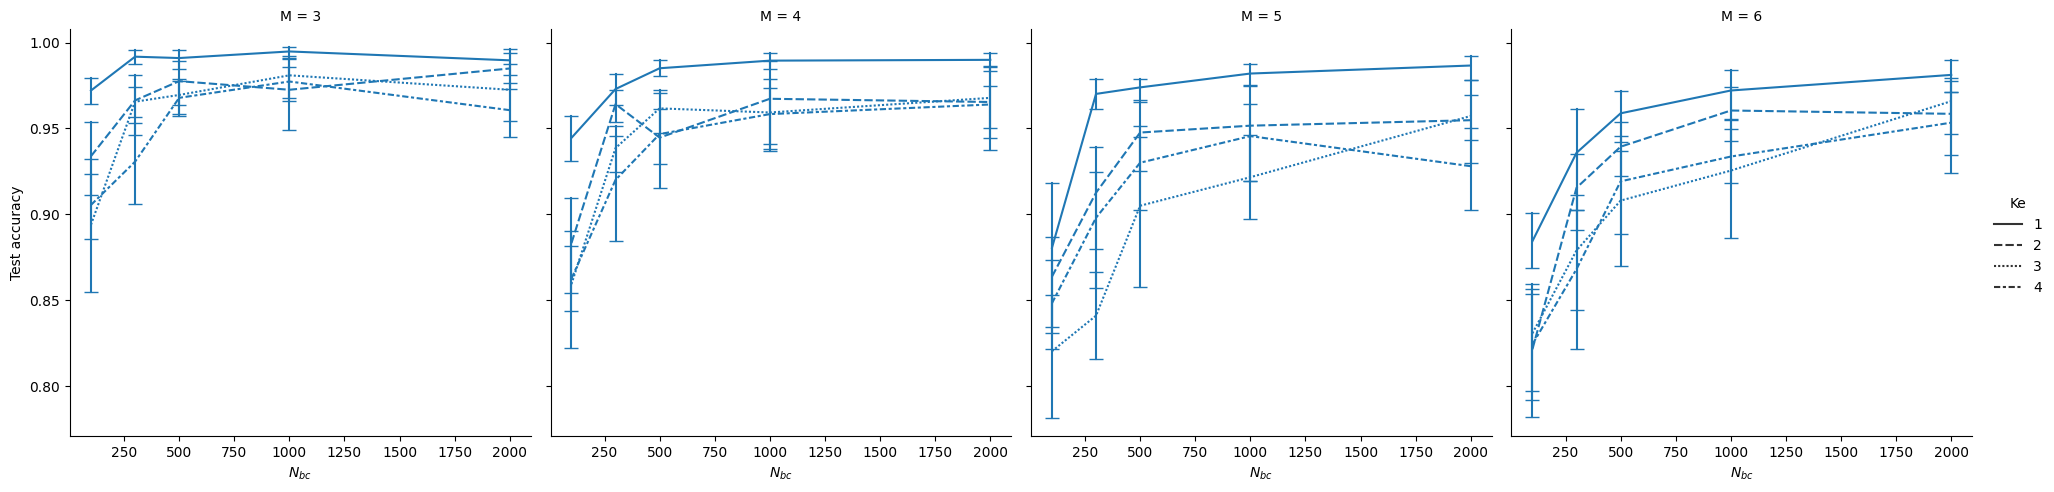

In [50]:
df = df_RMP

dff = df[(df["Error"] == 0) & (df["Ke"] == df["Ko"])]

g = sns.relplot(
    data=dff,
    x="N_bc",
    y="FITNESS",
    style="Ke",
    col="M",
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

g.set(xlabel='$N_{bc}$', ylabel='Test accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

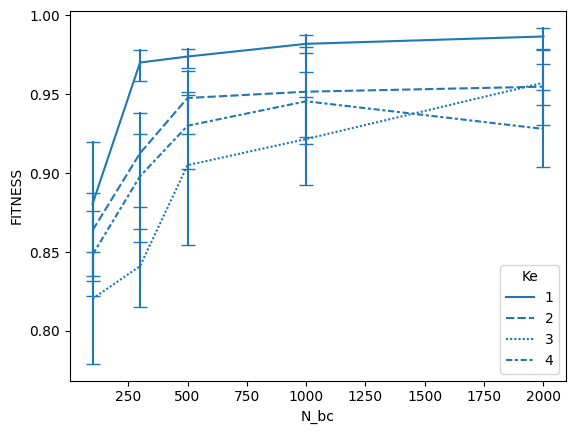

In [51]:
df = df_RMP

dff = df[(df["Error"] == 0) & (df["Ke"] == df["Ko"])]

g = sns.lineplot(
    data=dff[dff["M"] == 5],
    x="N_bc",
    y="FITNESS",
    style="Ke",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

# g.set(xlabel='$N_{bc}$', ylabel='Train accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

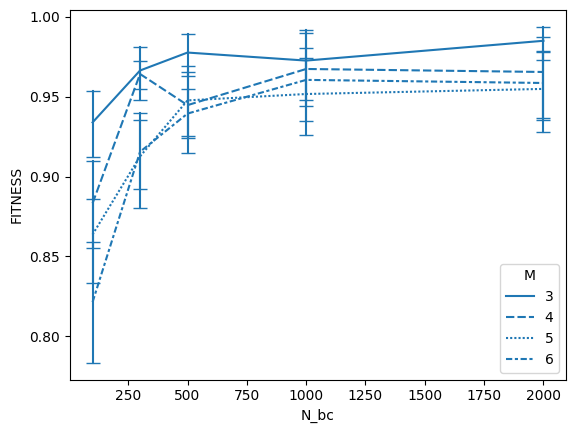

In [52]:
df = df_RMP

dff = df[(df["Error"] == 0) & (df["Ke"] == df["Ko"])]

g = sns.lineplot(
    data=dff[dff["Ke"] == 2],
    x="N_bc",
    y="FITNESS",
    style="M",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

# g.set(xlabel='$N_{bc}$', ylabel='Train accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

## Unknown P

### Train

yeah
['scaled y ticks=manual:{}{\\pgfmathparse{#1}}', 'tick align=outside', 'tick pos=left', 'title={M = 15}', 'x grid style={darkgrey176}', 'xlabel={\\(\\displaystyle N_{bc}\\)}', 'xmin=5, xmax=2095', 'xtick style={color=black}', 'y grid style={darkgrey176}', 'ylabel={Train accuracy}', 'ymin=0.948690109375, ymax=1.002443328125', 'ytick style={color=black}', 'yticklabels={}', 'legend cell align={left}', 'legend style={fill opacity=0.8, draw opacity=1, text opacity=1, at={(0.91,0.5)}, anchor=east, draw=none}']


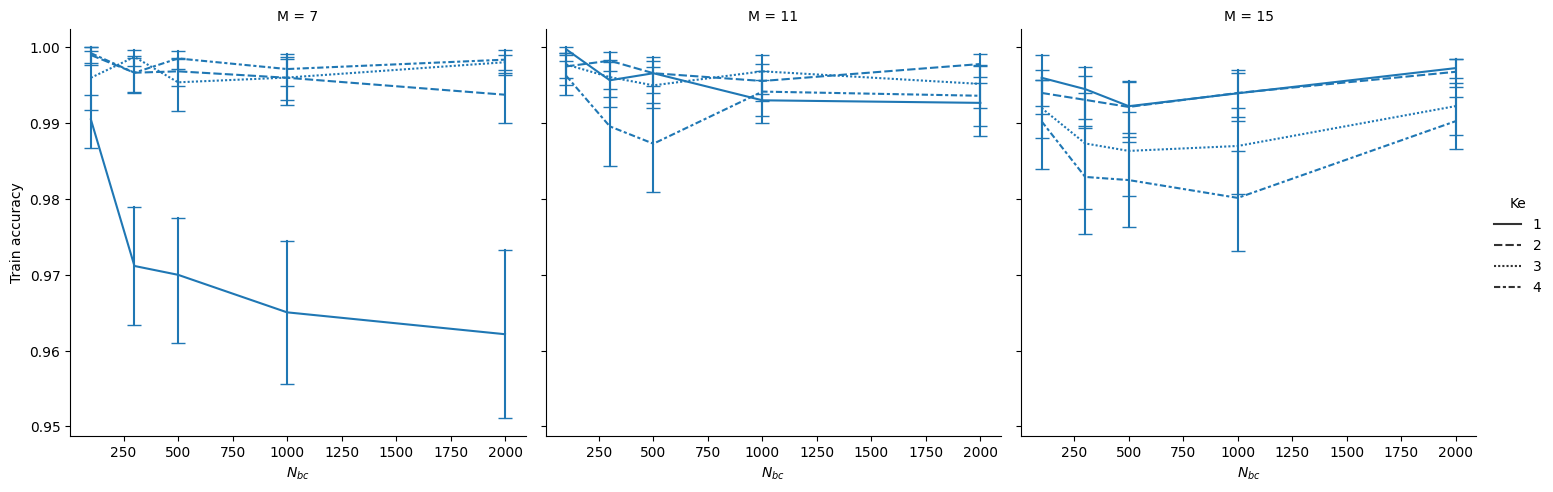

In [59]:
df = df_SRMP

dff = df[df["Error"] == 0]

g = sns.relplot(
    data=dff,
    x="N_bc",
    y="Fitness",
    style="Ke",
    col="M",
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

g.set(xlabel='$N_{bc}$', ylabel='Train accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

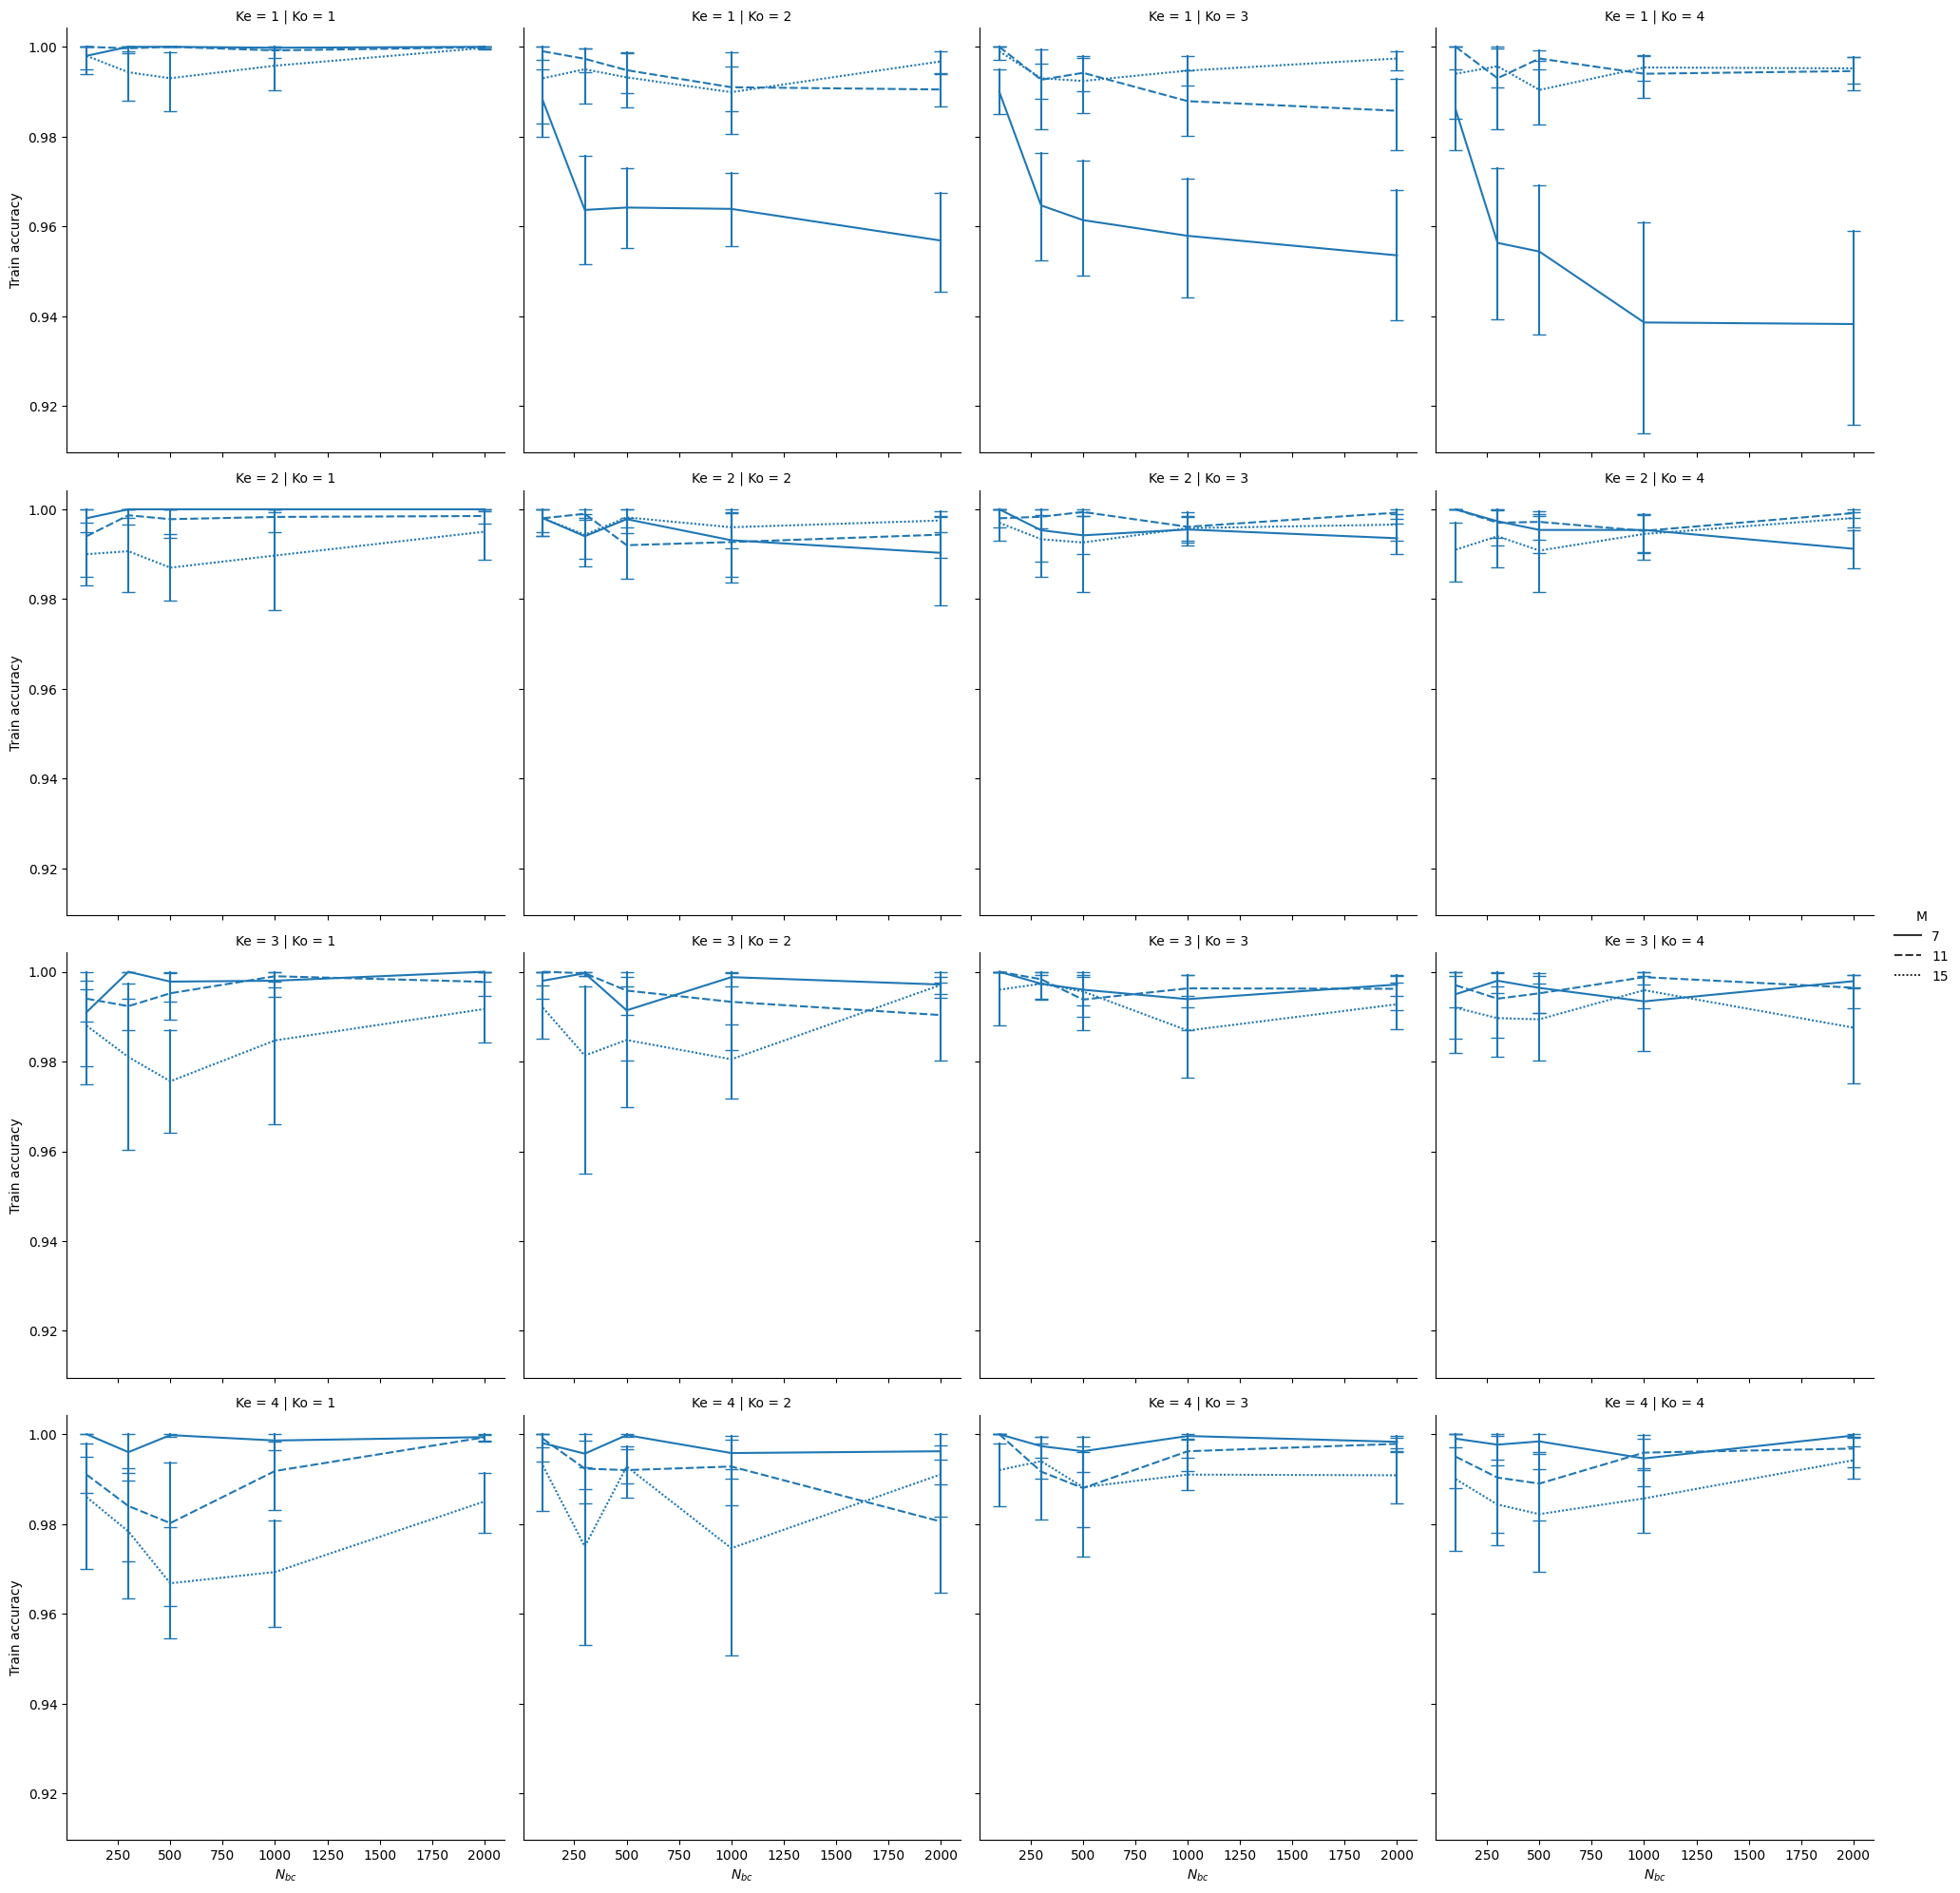

In [15]:
df = df_SRMP

dff = df[df["Error"] == 0]

g = sns.relplot(
    data=dff,
    x="N_bc",
    y="Fitness",
    style="M",
    col="Ko",
    row="Ke",
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

g.set(xlabel='$N_{bc}$', ylabel='Train accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

yeah
['scaled y ticks=manual:{}{\\pgfmathparse{#1}}', 'tick align=outside', 'tick pos=left', 'title={M = 6}', 'x grid style={darkgrey176}', 'xlabel={\\(\\displaystyle N_{bc}\\)}', 'xmin=5, xmax=2095', 'xtick style={color=black}', 'y grid style={darkgrey176}', 'ylabel={Train accuracy}', 'ymin=0.85408546875, ymax=1.00668640625', 'ytick style={color=black}', 'yticklabels={}', 'legend cell align={left}', 'legend style={fill opacity=0.8, draw opacity=1, text opacity=1, at={(0.91,0.5)}, anchor=east, draw=none}']


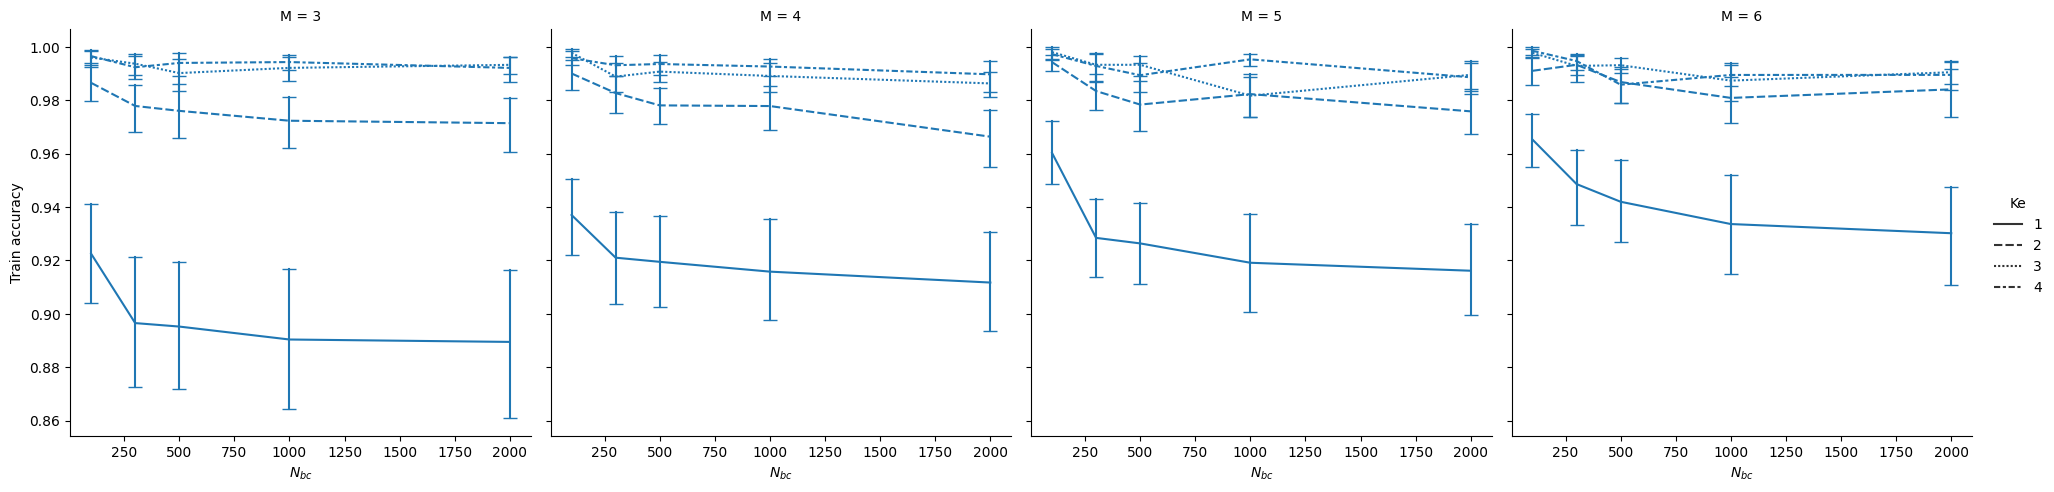

In [60]:
df = df_RMP

dff = df[df["Error"] == 0]

g = sns.relplot(
    data=dff,
    x="N_bc",
    y="Fitness",
    style="Ke",
    col="M",
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

g.set(xlabel='$N_{bc}$', ylabel='Train accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

### Test

yeah
['scaled y ticks=manual:{}{\\pgfmathparse{#1}}', 'tick align=outside', 'tick pos=left', 'title={M = 15}', 'x grid style={darkgrey176}', 'xlabel={\\(\\displaystyle N_{bc}\\)}', 'xmin=5, xmax=2095', 'xtick style={color=black}', 'y grid style={darkgrey176}', 'ylabel={Test accuracy}', 'ymin=0.743585353145629, ymax=1.00066818226145', 'ytick style={color=black}', 'yticklabels={}', 'legend cell align={left}', 'legend style={fill opacity=0.8, draw opacity=1, text opacity=1, at={(0.91,0.5)}, anchor=east, draw=none}']


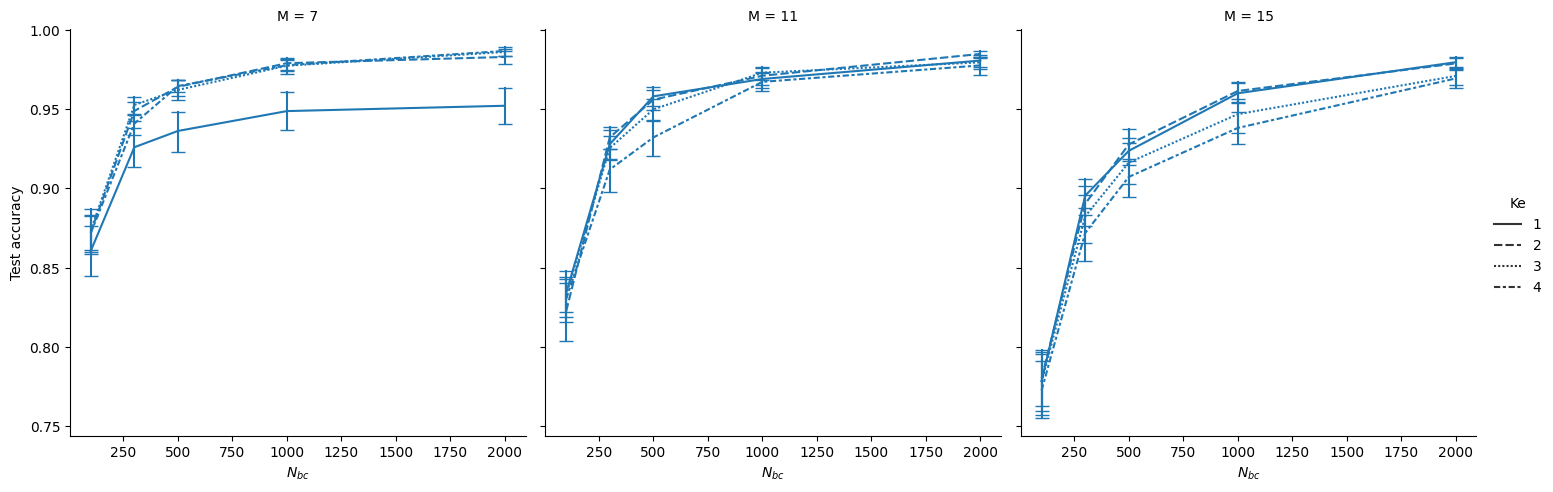

In [61]:
df = df_SRMP

dff = df[df["Error"] == 0]

g = sns.relplot(
    data=dff,
    x="N_bc",
    y="FITNESS",
    style="Ke",
    col="M",
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

g.set(xlabel='$N_{bc}$', ylabel='Test accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

yeah
['scaled y ticks=manual:{}{\\pgfmathparse{#1}}', 'tick align=outside', 'tick pos=left', 'title={M = 6}', 'x grid style={darkgrey176}', 'xlabel={\\(\\displaystyle N_{bc}\\)}', 'xmin=5, xmax=2095', 'xtick style={color=black}', 'y grid style={darkgrey176}', 'ylabel={Test accuracy}', 'ymin=0.756403720039008, ymax=1.00002967373975', 'ytick style={color=black}', 'yticklabels={}', 'legend cell align={left}', 'legend style={fill opacity=0.8, draw opacity=1, text opacity=1, at={(0.91,0.5)}, anchor=east, draw=none}']


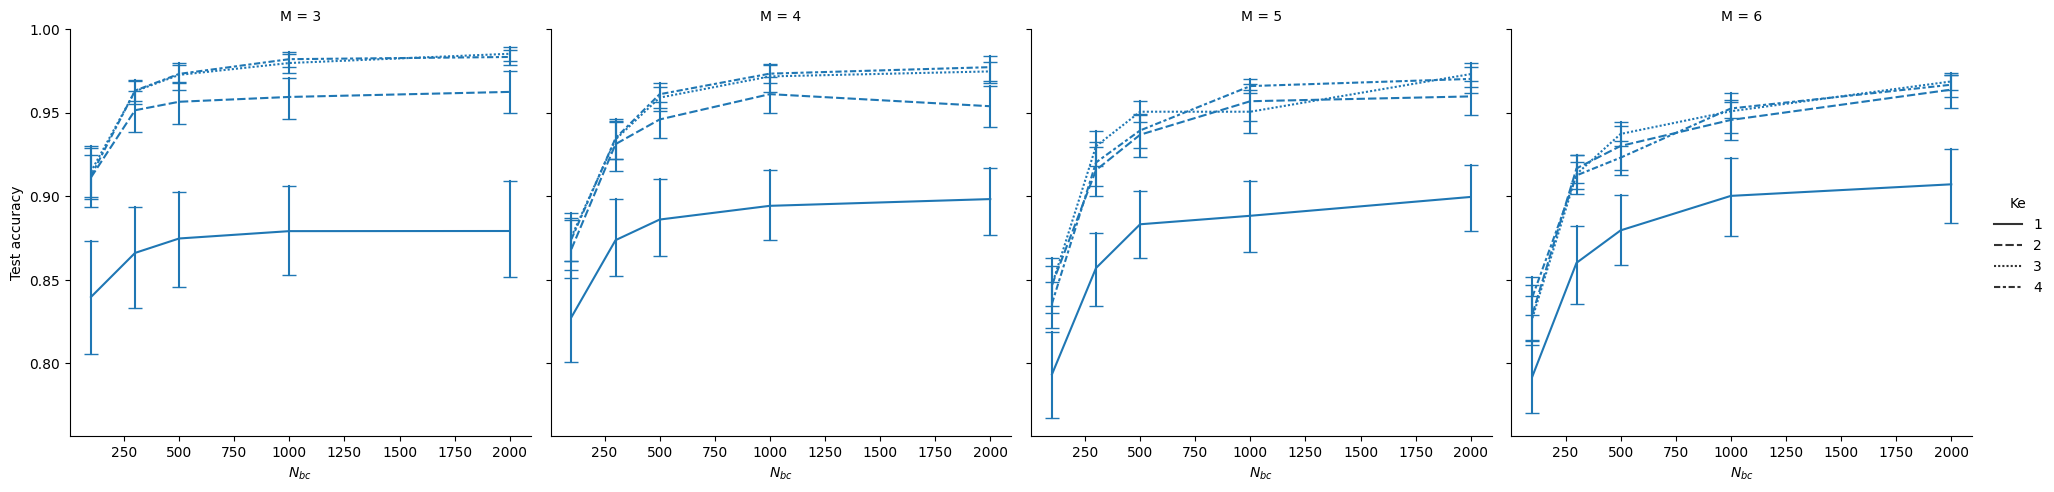

In [62]:
df = df_RMP

dff = df[df["Error"] == 0]

g = sns.relplot(
    data=dff[dff["Error"] == 0],
    x="N_bc",
    y="FITNESS",
    style="Ke",
    col="M",
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

g.set(xlabel='$N_{bc}$', ylabel='Test accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

## Noise

### Train

yeah
['scaled y ticks=manual:{}{\\pgfmathparse{#1}}', 'tick align=outside', 'tick pos=left', 'title={Ke = 4 | M = 15}', 'x grid style={darkgrey176}', 'xlabel={\\(\\displaystyle N_{bc}\\)}', 'xmin=5, xmax=2095', 'xtick style={color=black}', 'y grid style={darkgrey176}', 'ylabel={Test accuracy}', 'ymin=0.67513, ymax=1.01547', 'ytick style={color=black}', 'yticklabels={}', 'legend cell align={left}', 'legend style={fill opacity=0.8, draw opacity=1, text opacity=1, at={(0.91,0.5)}, anchor=east, draw=none}']


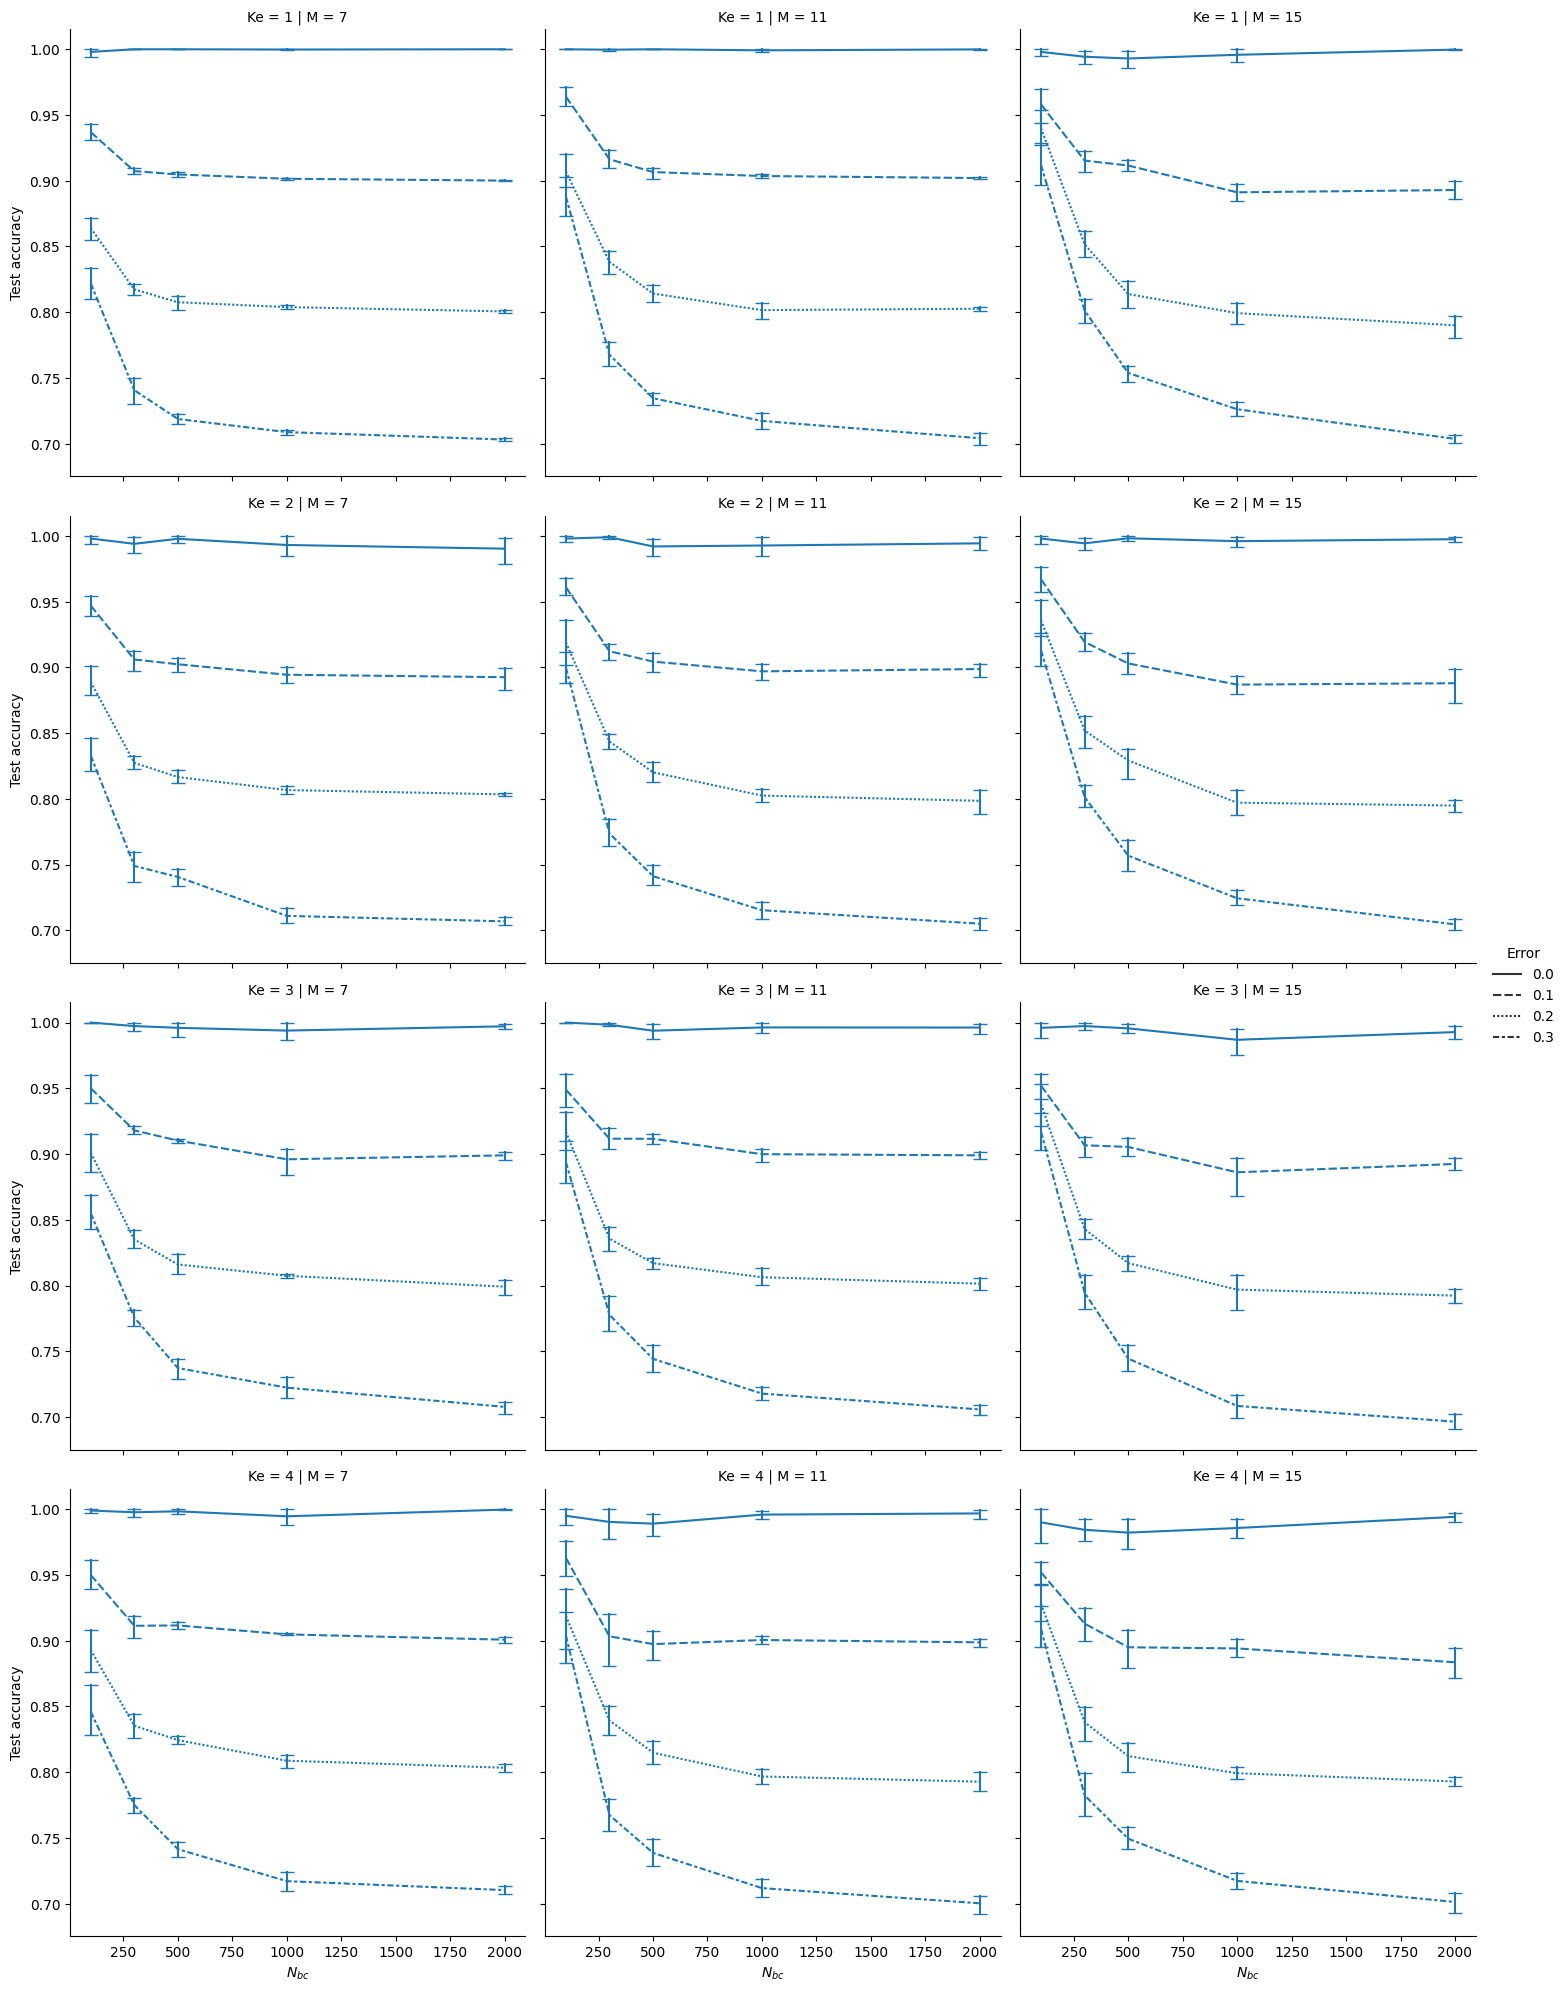

In [ ]:
df = df_SRMP

dff = df[df["Ke"] == df["Ko"]]

g = sns.relplot(
    data=dff,
    x="N_bc",
    y="Fitness",
    style="Error",
    row="Ke",
    col="M",
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

g.set(xlabel='$N_{bc}$', ylabel='Train accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

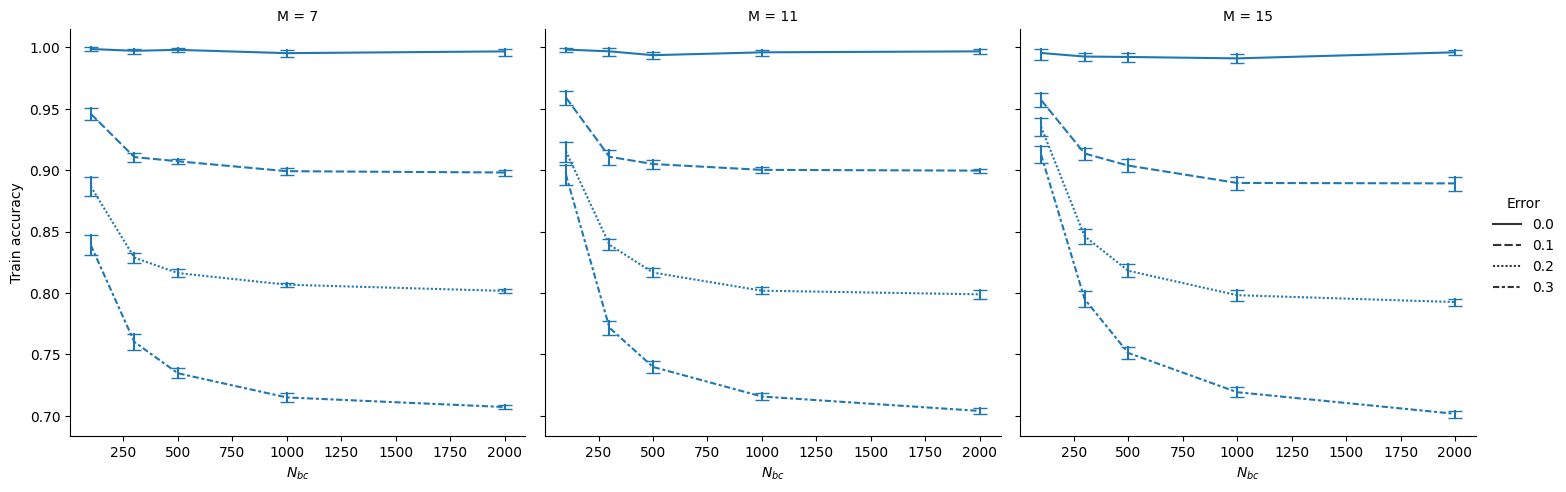

In [ ]:
df = df_SRMP

dff = df[df["Ke"] == df["Ko"]]

g = sns.relplot(
    data=dff,
    x="N_bc",
    y="Fitness",
    style="Error",
    # row="Error",
    col="M",
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 2},
)

g.set(xlabel='$N_{bc}$', ylabel='Train accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

yeah
['scaled y ticks=manual:{}{\\pgfmathparse{#1}}', 'tick align=outside', 'tick pos=left', 'title={Ke = 4 | M = 6}', 'x grid style={darkgrey176}', 'xlabel={\\(\\displaystyle N_{bc}\\)}', 'xmin=5, xmax=2095', 'xtick style={color=black}', 'y grid style={darkgrey176}', 'ylabel={Test accuracy}', 'ymin=0.6557561875, ymax=1.0163925625', 'ytick style={color=black}', 'yticklabels={}', 'legend cell align={left}', 'legend style={fill opacity=0.8, draw opacity=1, text opacity=1, at={(0.91,0.5)}, anchor=east, draw=none}']


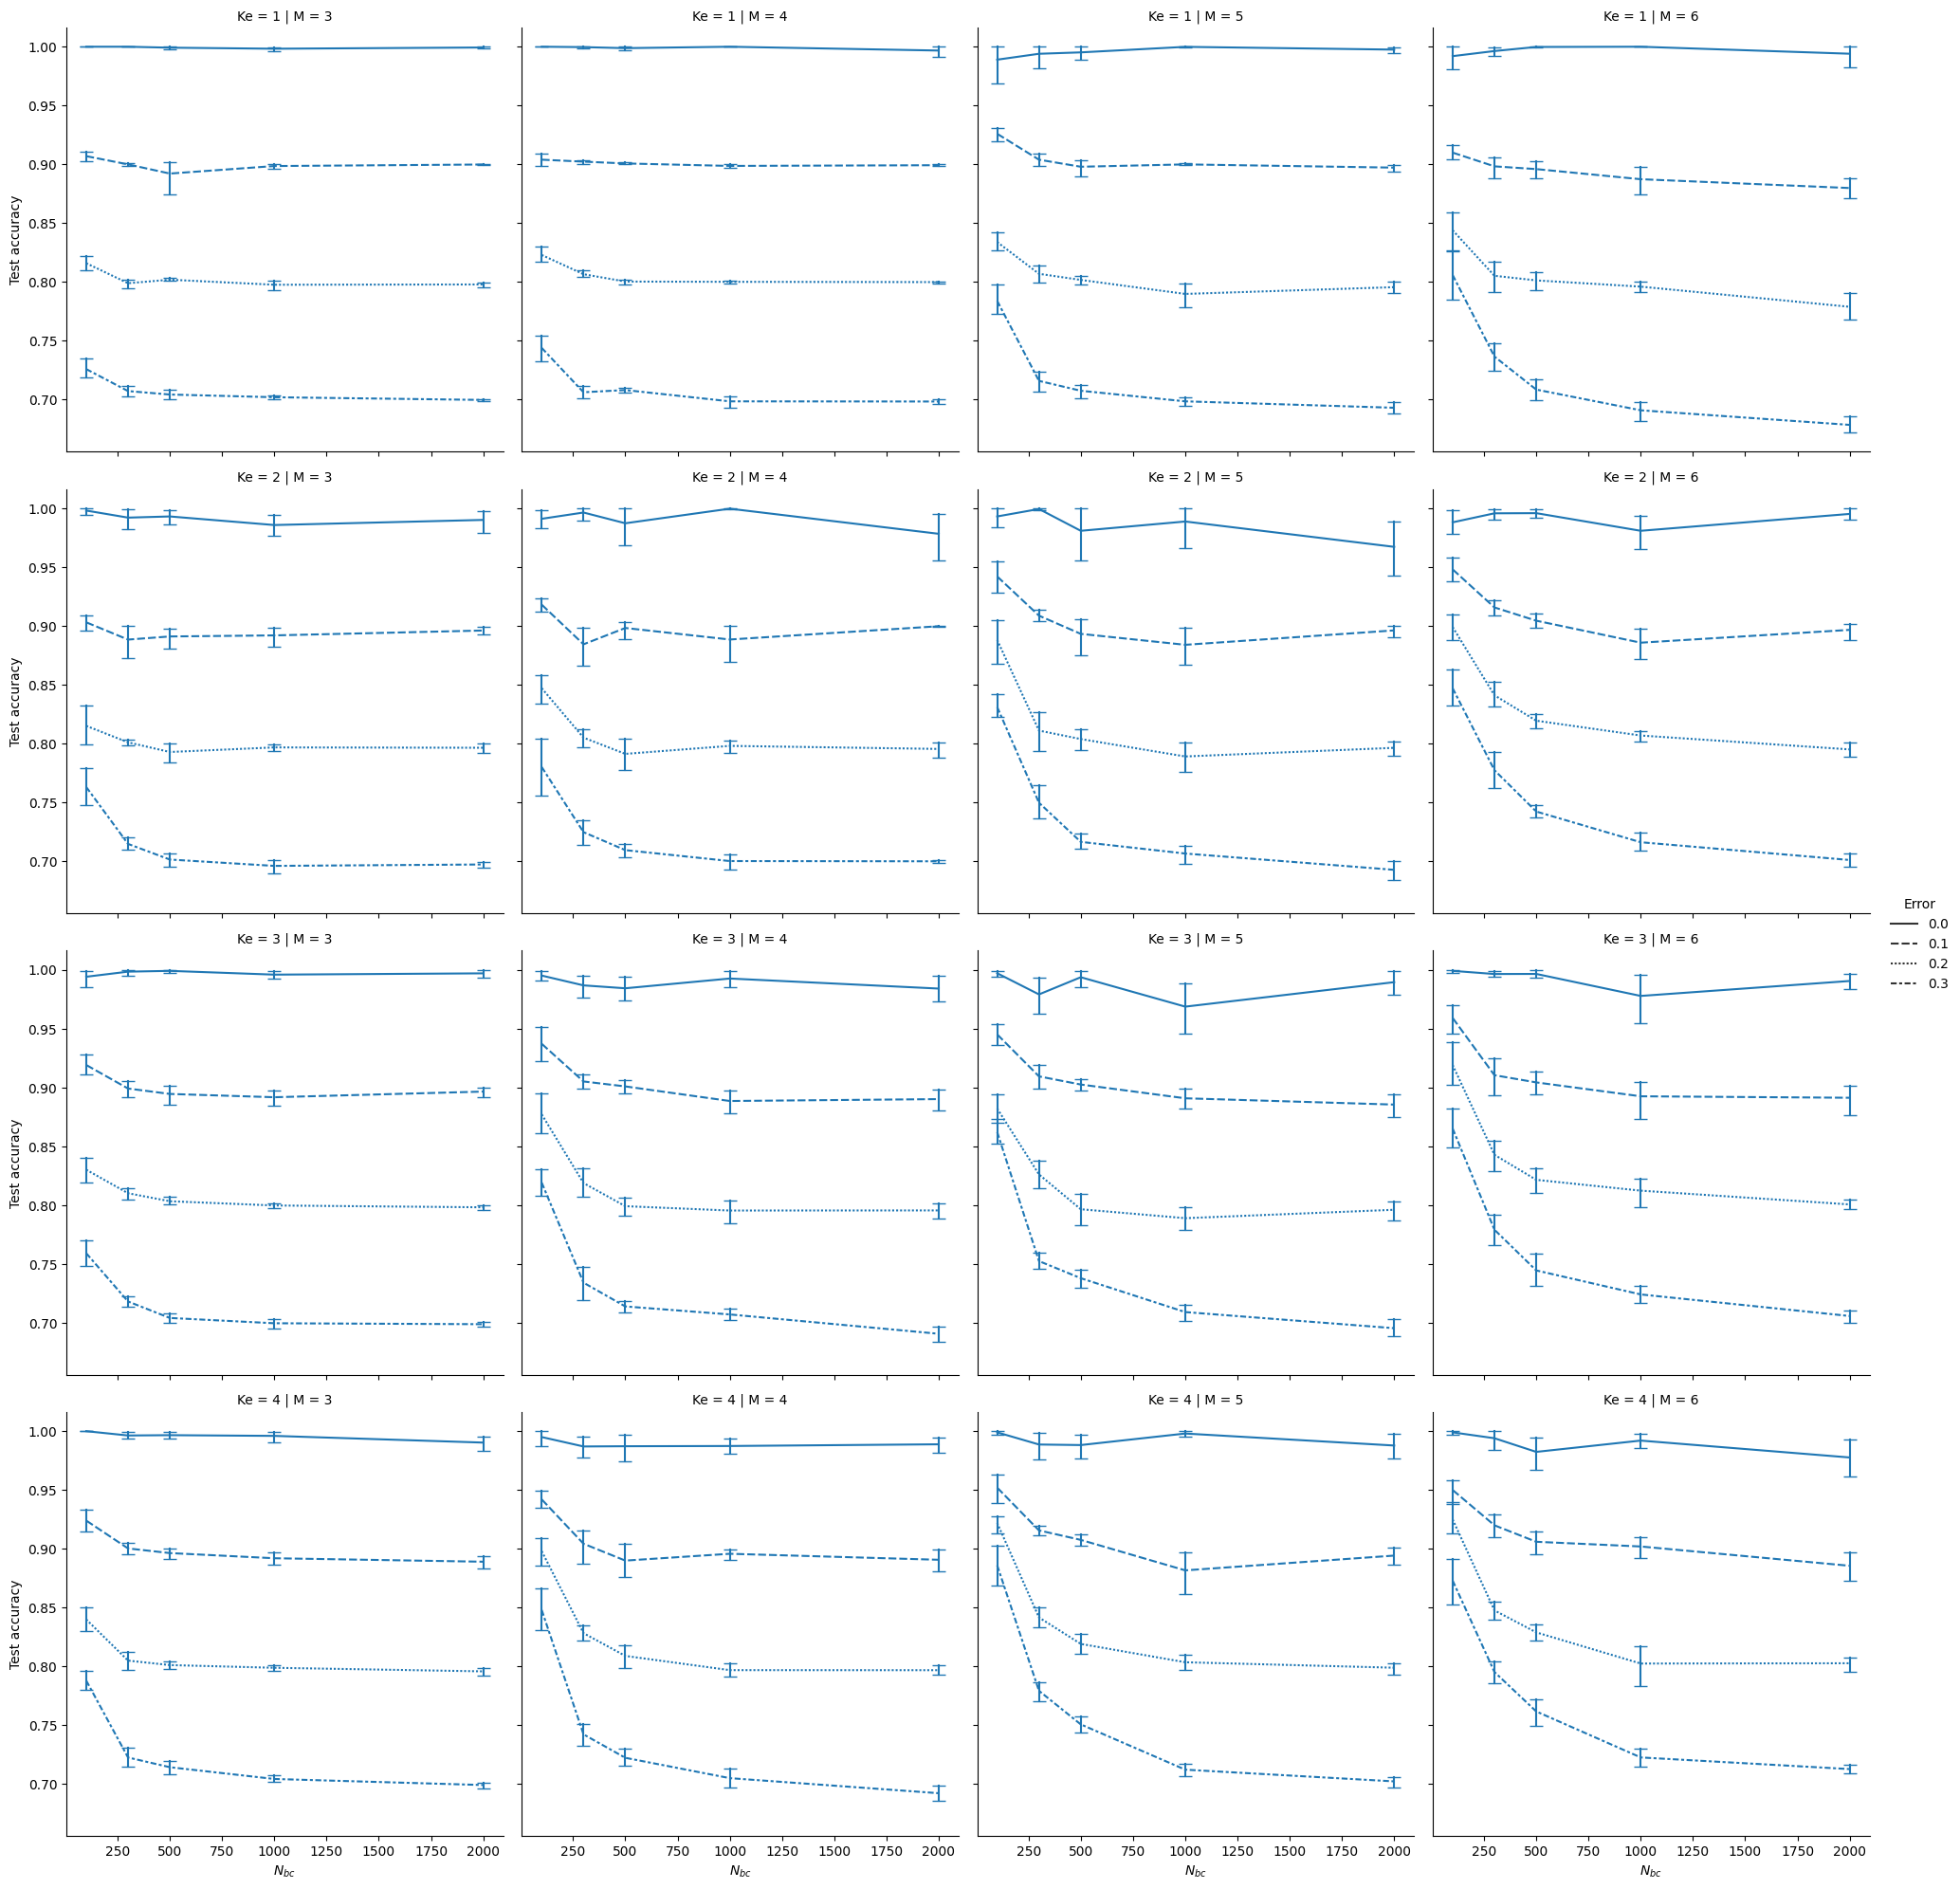

In [ ]:
df = df_RMP

dff = df[df["Ke"] == df["Ko"]]

g = sns.relplot(
    data=dff,
    x="N_bc",
    y="Fitness",
    style="Error",
    row="Ke",
    col="M",
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

g.set(xlabel='$N_{bc}$', ylabel='Train accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

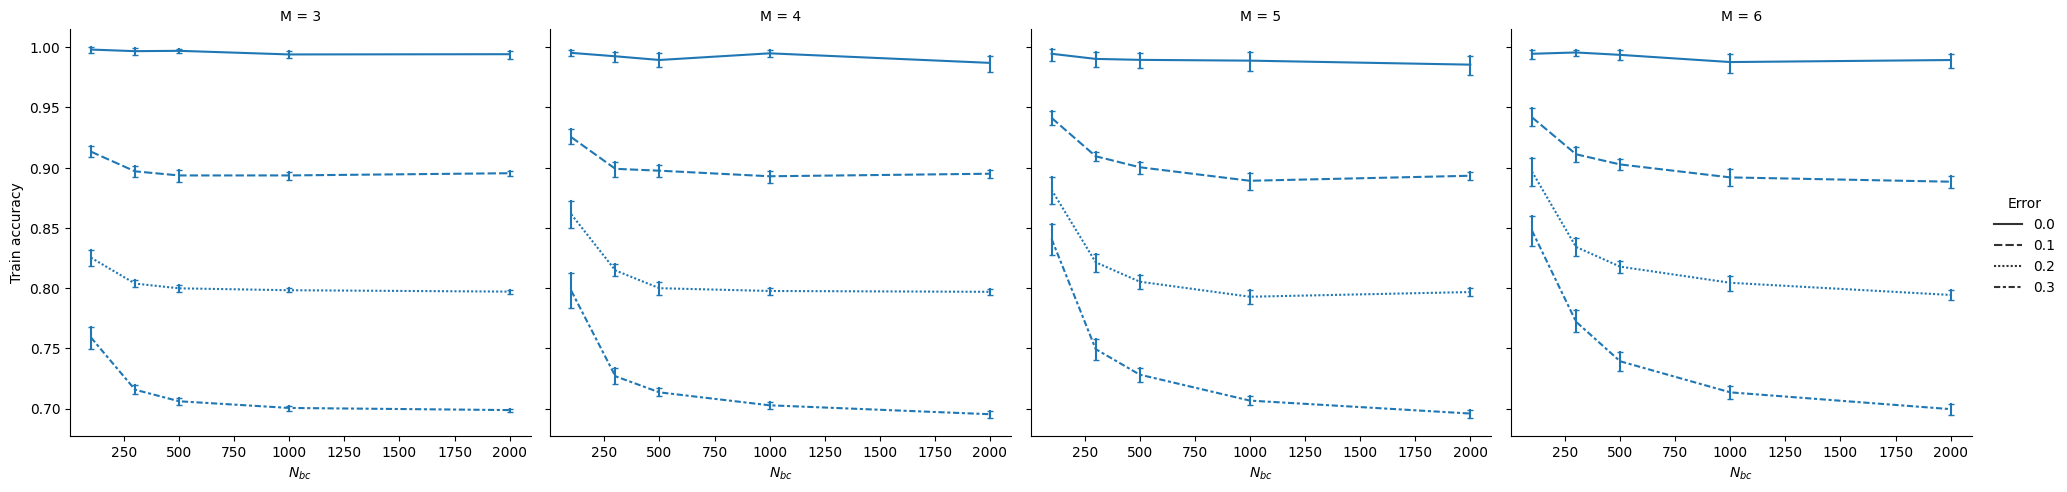

In [13]:
df = df_RMP

dff = df[df["Ke"] == df["Ko"]]

g = sns.relplot(
    data=dff,
    x="N_bc",
    y="Fitness",
    style="Error",
    # row="Error",
    col="M",
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 2},
)

g.set(xlabel='$N_{bc}$', ylabel='Train accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

### Test

yeah
['scaled y ticks=manual:{}{\\pgfmathparse{#1}}', 'tick align=outside', 'tick pos=left', 'title={Ko = 4 | M = 15}', 'x grid style={darkgrey176}', 'xlabel={\\(\\displaystyle N_{bc}\\)}', 'xmin=5, xmax=2095', 'xtick style={color=black}', 'y grid style={darkgrey176}', 'ylabel={Train accuracy}', 'ymin=0.563919288667734, ymax=1.01624779094819', 'ytick style={color=black}', 'yticklabels={}', 'legend cell align={left}', 'legend style={fill opacity=0.8, draw opacity=1, text opacity=1, at={(0.91,0.5)}, anchor=east, draw=none}']


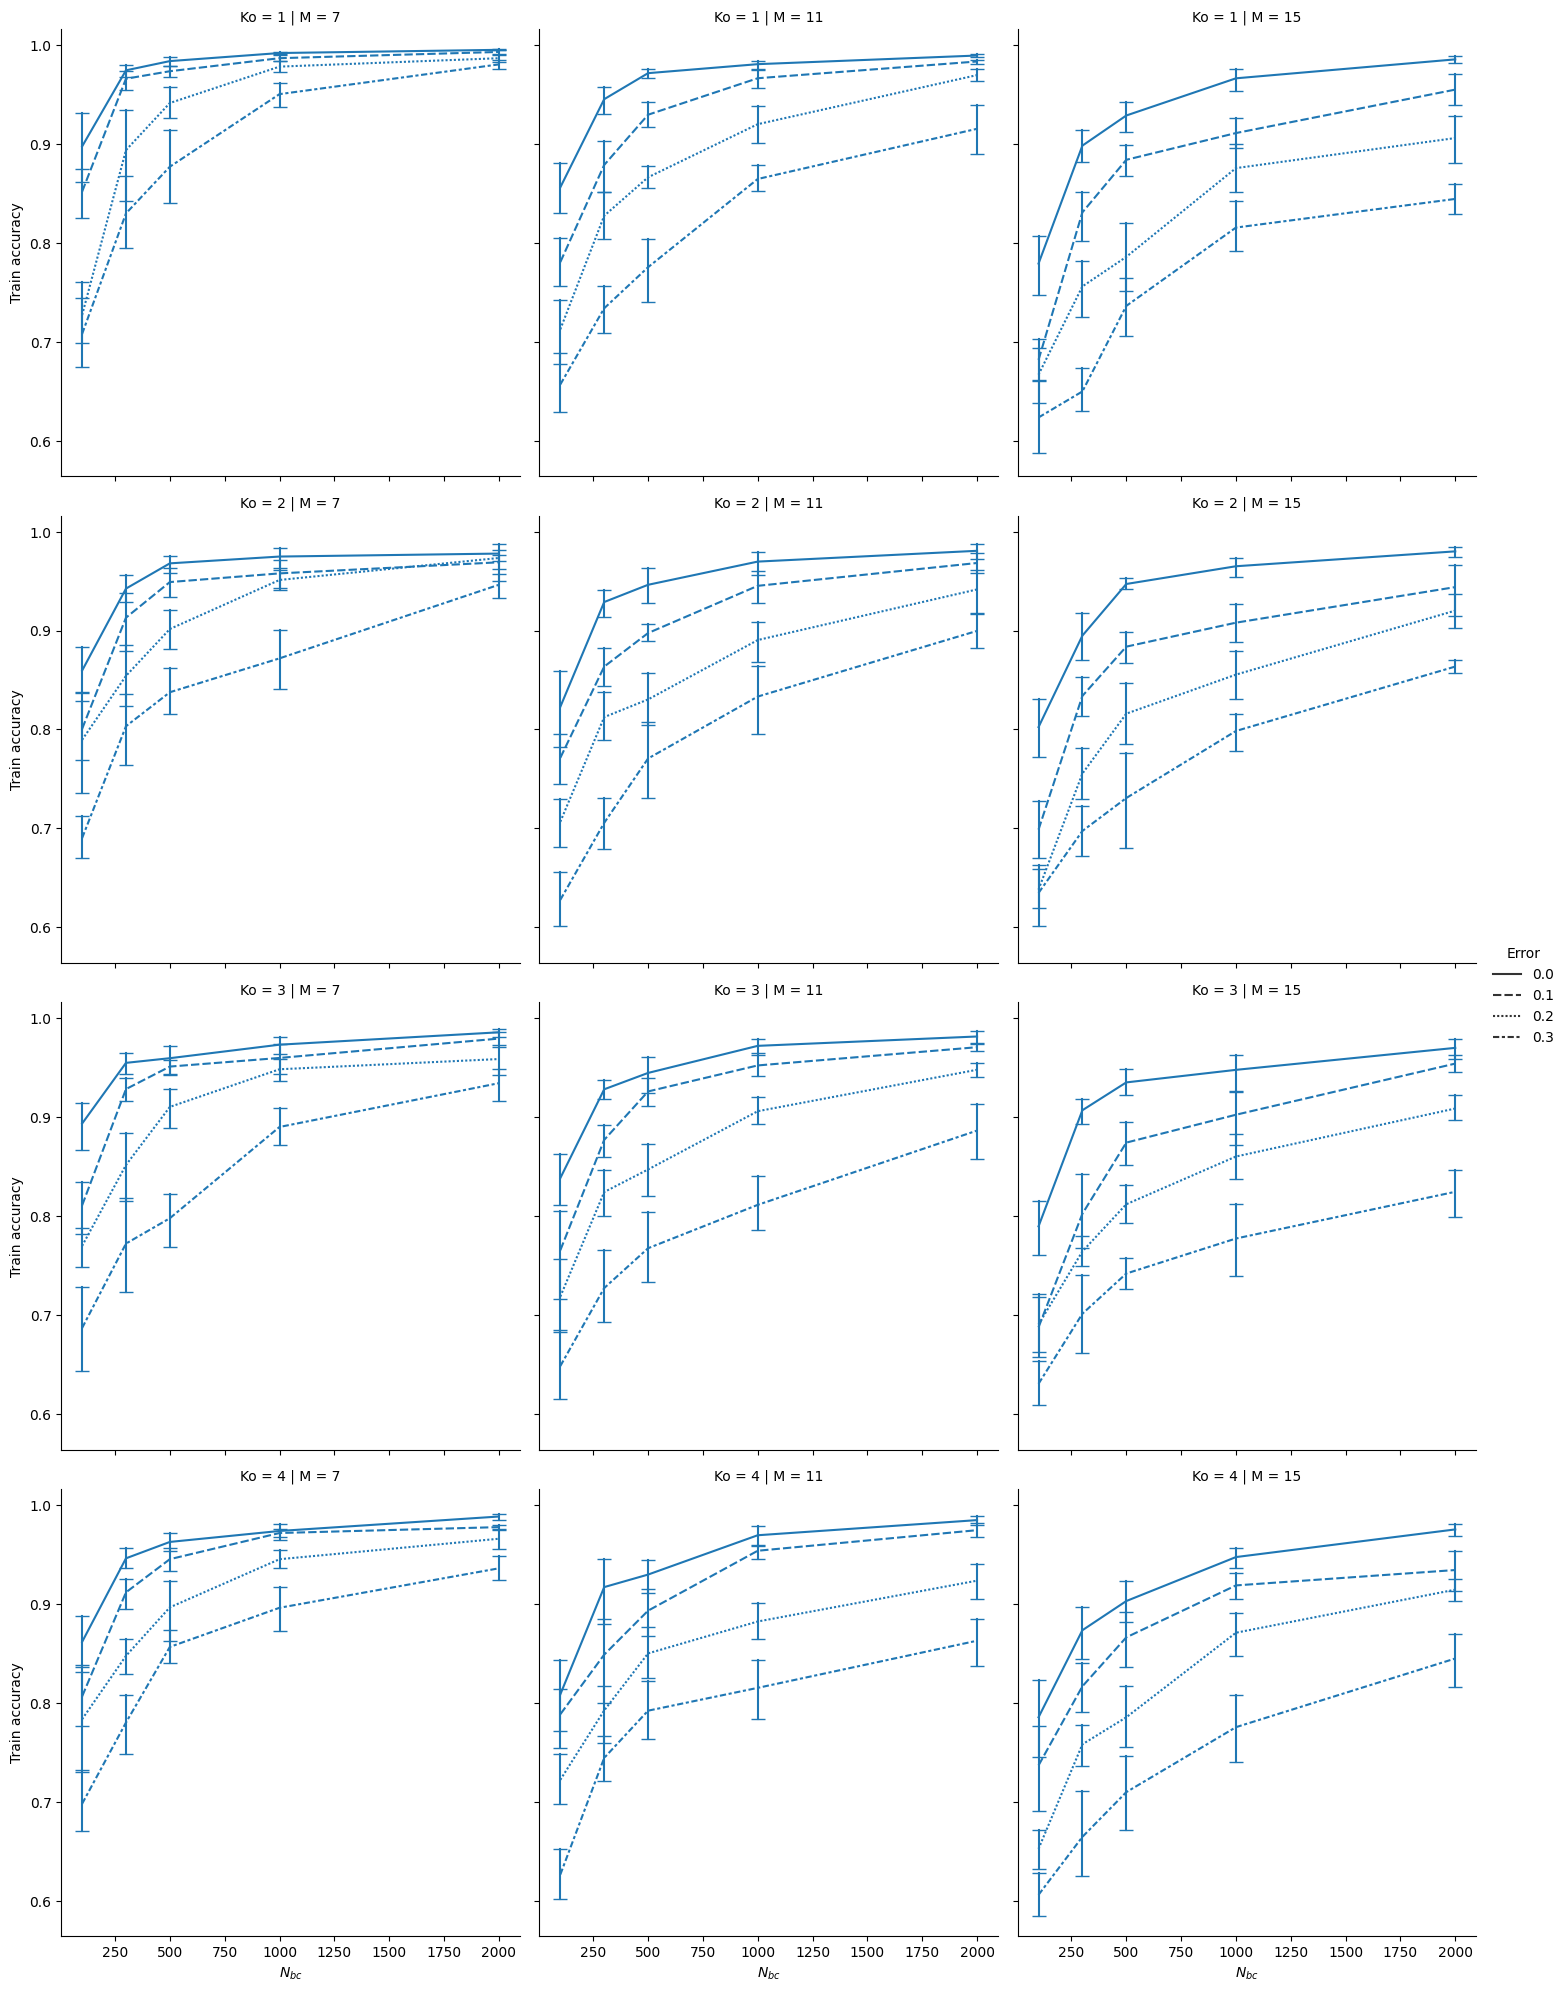

In [ ]:
df = df_SRMP

dff = df[df["Ke"] == df["Ko"]]

g = sns.relplot(
    data=dff,
    x="N_bc",
    y="FITNESS",
    style="Error",
    row="Ko",
    col="M",
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

g.set(xlabel='$N_{bc}$', ylabel='Test accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

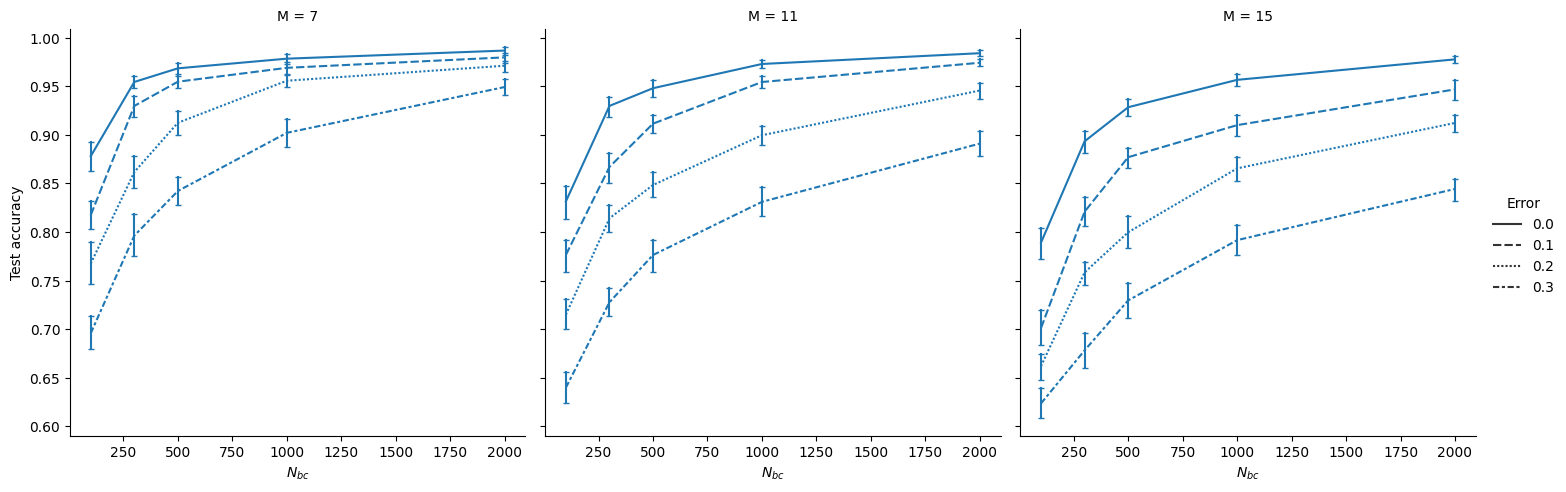

In [14]:
df = df_SRMP

dff = df[df["Ke"] == df["Ko"]]

g = sns.relplot(
    data=dff,
    x="N_bc",
    y="FITNESS",
    style="Error",
    # row="Error",
    col="M",
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 2},
)

g.set(xlabel='$N_{bc}$', ylabel='Test accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

yeah
['scaled y ticks=manual:{}{\\pgfmathparse{#1}}', 'tick align=outside', 'tick pos=left', 'title={Ko = 4 | M = 6}', 'x grid style={darkgrey176}', 'xlabel={\\(\\displaystyle N_{bc}\\)}', 'xmin=5, xmax=2095', 'xtick style={color=black}', 'y grid style={darkgrey176}', 'ylabel={Test accuracy}', 'ymin=0.641191826055211, ymax=1.01449142839568', 'ytick style={color=black}', 'yticklabels={}', 'legend cell align={left}', 'legend style={fill opacity=0.8, draw opacity=1, text opacity=1, at={(0.91,0.5)}, anchor=east, draw=none}']


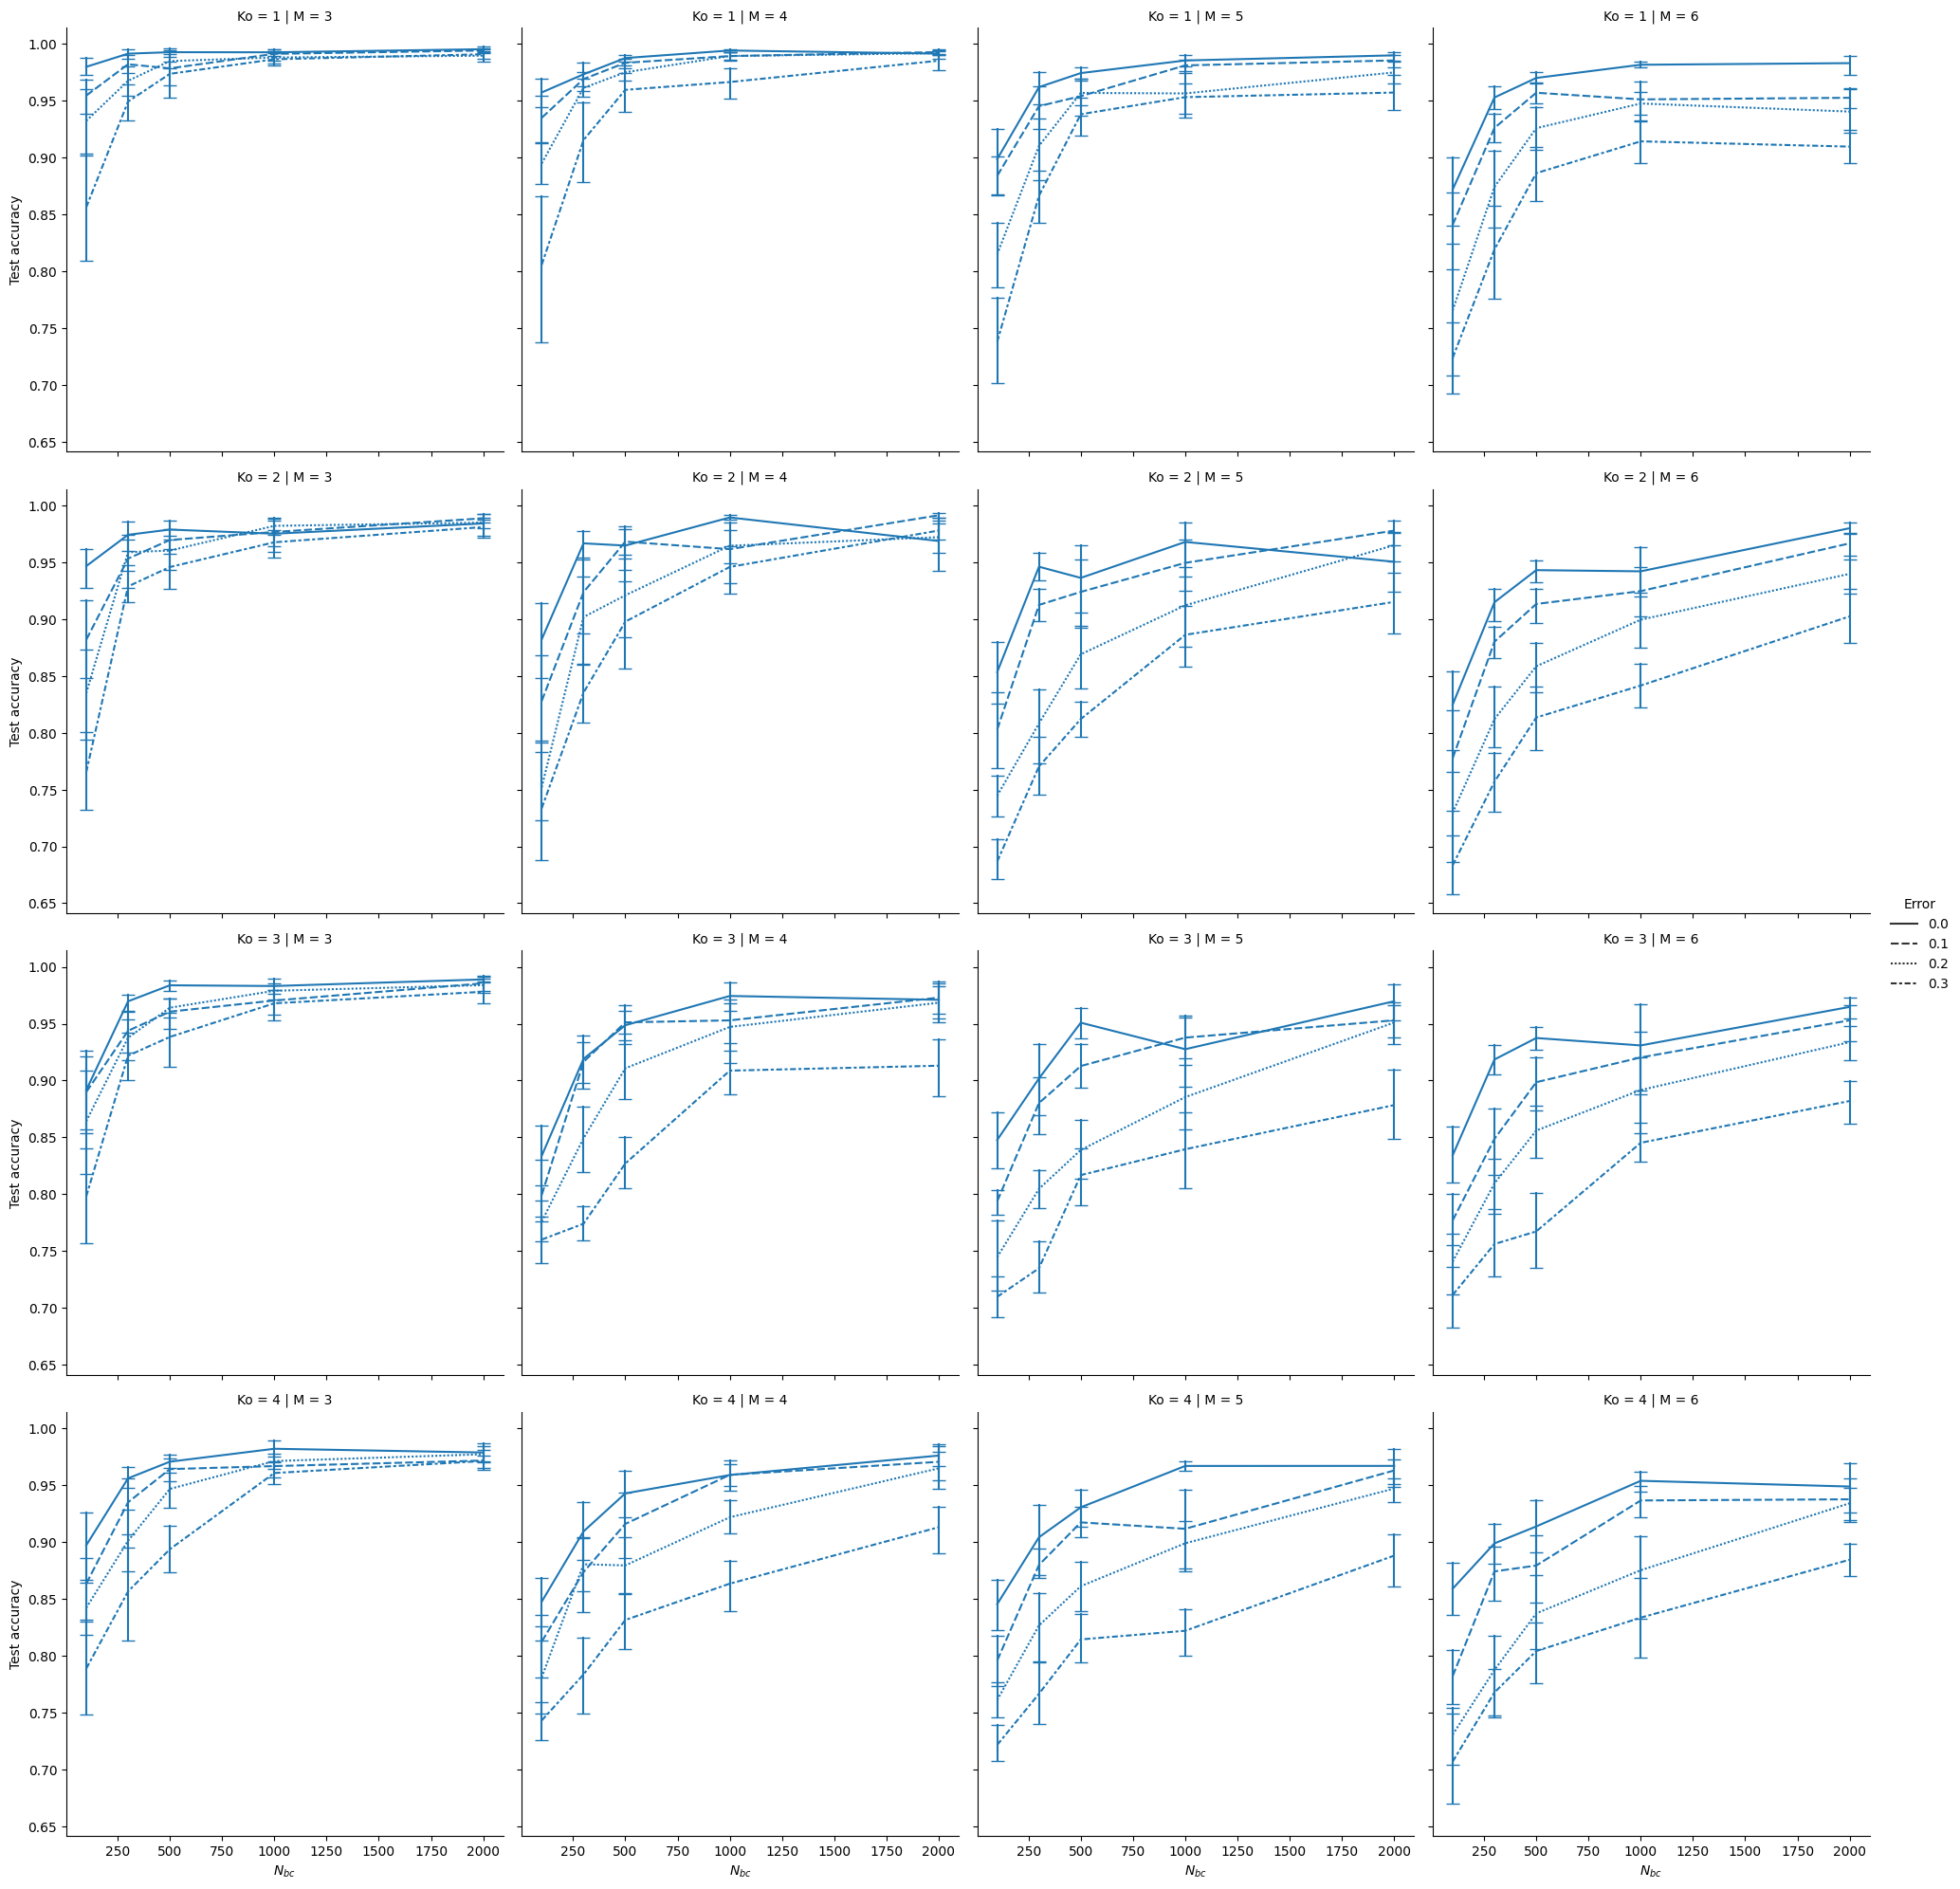

In [69]:
df = df_RMP

dff = df[df["Ke"] == df["Ko"]]

g = sns.relplot(
    data=dff,
    x="N_bc",
    y="FITNESS",
    style="Error",
    row="Ko",
    col="M",
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

g.set(xlabel='$N_{bc}$', ylabel='Test accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)

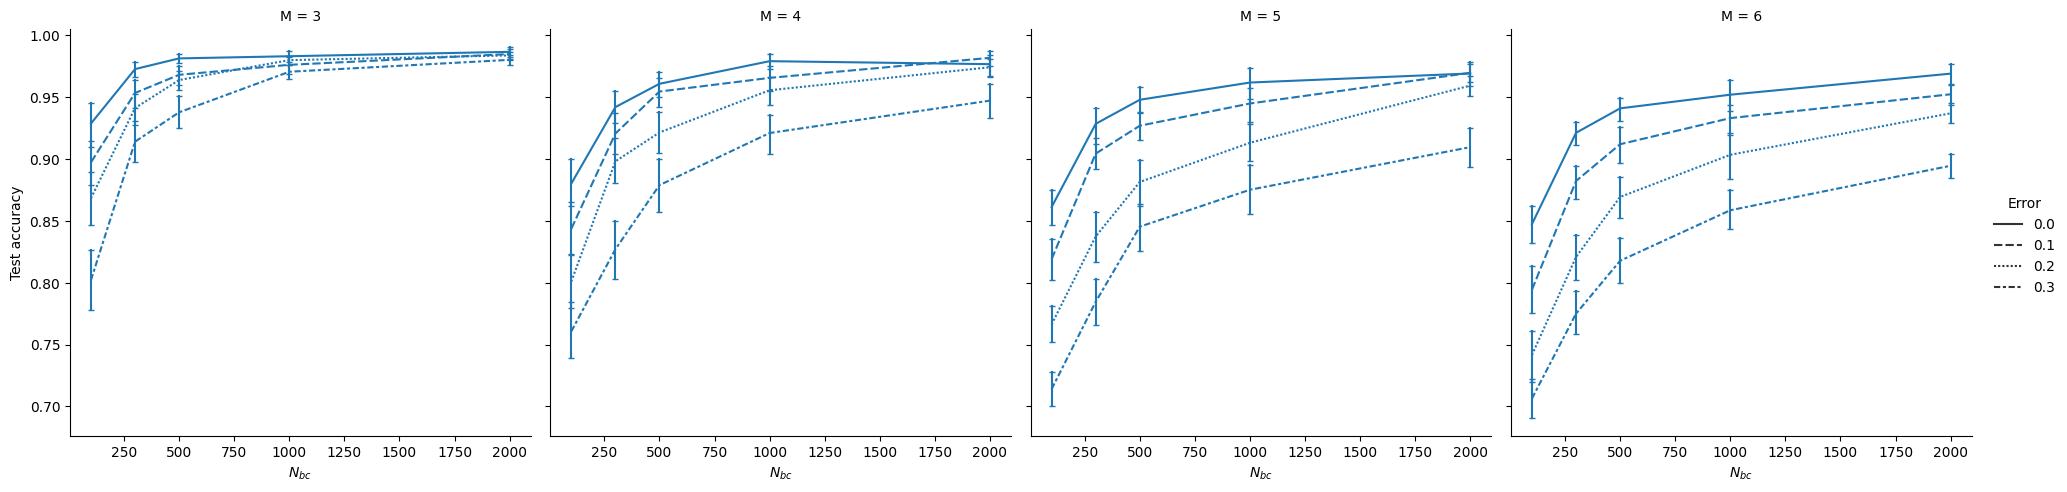

In [15]:
df = df_RMP

dff = df[df["Ke"] == df["Ko"]]

g = sns.relplot(
    data=dff,
    x="N_bc",
    y="FITNESS",
    style="Error",
    # row="Error",
    col="M",
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 2},
)

g.set(xlabel='$N_{bc}$', ylabel='Test accuracy')

tikzplotlib.save("mytikz.tex", standalone=True)